# GEOG5995M Final Assignment:
# How does the number of schools present in a county influence primary and secondary school enrollment?
Student ID number: 201679348

## Introduction
Education holds an important role in Kenyan governance, evident through the dedicated Ministry of Education and supporting legislative acts <a href="https://education.go.ke/background-information">[1]</a>. The government has rolled out sevral initiatives to encourage enrollment of students in both primary and secondary schools, such as introducing free primary school education in 2003 <a href="http://books.openedition.org/africae/2540">[2]</a>, and free day school secondary school education in 2008 <a href="https://rafiki-foundation.org.uk/wp-content/uploads/2021/11/Education-factsheet-Kenya.pdf">[3]</a>. 


These initiatives have served the country well, with the enrollment of students in primary school increasing from 9.95 million in 2014 to 10.17 million in 2020, and students in secondary school from 2.3 million in 2014 to 3.5 million in 2020 <a href="https://www.knbs.or.ke/download/statistical-abstract-2021/">[4]</a>. Although in theory education in public schools is free, the reality is that the government pays a subsidy to the school, and a lot of the schools charge school fees especially for secondary schools <a href="https://rafiki-foundation.org.uk/wp-content/uploads/2021/11/Education-factsheet-Kenya.pdf">[3]</a>. The infrastructure and staff available for public schools is woefully inadequate, and  it has been observed that there is a great disparity in enrollment when observed by region and gender <a href="https://www.researchgate.net/publication/242223372_Access_to_Basic_Education_in_Kenya_inherent_concerns">[5]</a>.


This project seeks to look into the state of the education in Kenya by the number of students enrolled in primary and secondary school as per the 2019 Census and the available information on the schools available in each county.



## First steps! Reading in the data and data cleaning

We now had look into the data that we have available to us. First we read in our packages and our files.
The data that we're using for the project has been downloaded from multiple sources that have been listed below:
The county and school shapefiles were obtained from two users on Kaggle <a href="https://www.kaggle.com/datasets/eswillz/kenya-shapefiles">[6]</a>, <a href="https://www.kaggle.com/datasets/ambarish/kenya-counties-shapefile">[7]</a>, while the data on student enrollment was downloaded from the Kenya Bureau of National Statistics. <a href="https://www.knbs.or.ke/data-tables/">[8]</a>. The population distribution was also sourced from Kaggle. <a href="https://www.kaggle.com/datasets/paulmaluki/kenyapopulationdistibution-2019-censuscsv/">[9]</a>


The first part of the project is devoted to understanding how the data looks like and cleaning the data. This was done by looking at the first few rows of the data to see how the data looks like, then modifying the dataframe accordingly, such as dropping rows that won't be used.

In [1]:
#Reading in the packages
import pandas as pd
import numpy as np

import geopandas as gdp
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot


In [2]:
#Alright then, time to load our datasets
#I'll load the geofiles in one cell, then load the other csv files in the next cell
county_boundaries = gdp.read_file("C:/Users/gyrmo/Documents/Assignments/Y1 S1/Portfolio Assignment/Files/County_Data")
school_locations = gdp.read_file("C:/Users/gyrmo/Documents/Assignments/Y1 S1/Portfolio Assignment/Files/school_location/schools_kenya_shapefiles_2020")

In [3]:
#Loading in  the education records!
pop_distribution = pd.read_csv("C:/Users/gyrmo/Documents/Assignments/Y1 S1/Portfolio Assignment/Files/kenya-population-distibution-2019-census.csv")
primary_dist = pd.read_csv("C:/Users/gyrmo/Documents/Assignments/Y1 S1/Portfolio Assignment/Files/Ministry_of_Education_Records_on_Primary_School.csv")
secondary_dist = pd.read_csv("C:/Users/gyrmo/Documents/Assignments/Y1 S1/Portfolio Assignment/Files/Ministry_of_Education_Records_on_Secondary_School.csv")

In [4]:
#First looking into the county boundaries
county_boundaries.head()

,OBJECTID,AREA,PERIMETER,COUNTY3_,COUNTY3_ID,COUNTY,Shape_Leng,Shape_Area,geometry
0,1,5.677,15.047,2.0,1.0,Turkana,15.046838,5.676985,"POLYGON ((35.79593 5.34449, 35.79659 5.34468, ..."
1,2,6.177,11.974,3.0,2.0,Marsabit,11.974165,6.176831,"POLYGON ((36.05061 4.45622, 36.23184 4.45124, ..."
2,3,2.117,7.355,4.0,3.0,Mandera,7.355154,2.117196,"POLYGON ((41.62133 3.97673, 41.62272 3.97860, ..."
3,4,4.610,9.838,5.0,4.0,Wajir,9.838408,4.609589,"POLYGON ((39.31812 3.47197, 39.31956 3.47168, ..."
4,5,0.740,5.030,6.0,5.0,West Pokot,5.030271,0.740481,"POLYGON ((35.12745 2.62271, 35.12762 2.62302, ..."


In [5]:
#I'll drop the ID columns since I don't need them
county_boundaries = county_boundaries.drop(['OBJECTID','COUNTY3_','COUNTY3_ID'],axis=1)

In [6]:
#What about the schools?
school_locations.head()
#I'll get back to this dataframe later as I decide the best approach

,OBJECTID,CODE,SCHOOL_NAM,LEVEL,Status,County,DISTRICT,ZONE,SUB_COUNTY,Ward,X_Coord,Y_Coord,Source,geometry
0,1,1.0,BAKWANIN,Primary,Public,Baringo,BARINGO CENTRAL,KABASIS,Baringo Central,Sacho,35.79708,0.40955,"Ministry of Education, 2016",POINT (143417.238 10045338.886)
1,2,2.0,BEKIBON,Primary,Public,Baringo,BARINGO CENTRAL,TENGES,Baringo South,Marigat,35.88406,0.33640,"Ministry of Education, 2016",POINT (153107.652 10037237.735)
2,3,3.0,BOKORIN,Primary,Public,Baringo,BARINGO CENTRAL,KABARNET,Baringo Central,Kapropita,35.77177,0.53218,"Ministry of Education, 2016",POINT (140602.763 10058916.014)
3,4,4.0,BOROWONIN,Primary,Public,Baringo,BARINGO CENTRAL,KABARNET,Baringo Central,Kapropita,35.77864,0.44487,"Ministry of Education, 2016",POINT (141363.771 10049249.854)
4,5,5.0,BOSIN,Primary,Public,Baringo,BARINGO CENTRAL,KABASIS,Baringo Central,Sacho,35.79545,0.43809,"Ministry of Education, 2016",POINT (143236.887 10048498.462)


In [7]:
#Next up is the population distribution
pop_distribution.head()

,County,Total,Male,Female,Intersex
0,KENYA,"14,831,700","7,352,134","7,478,883",683
1,Mombasa,"1,208,333","610,257","598,046",30
2,Kwale,"126,431","62,395","64,031",5
3,Kilifi,"393,888","191,324","202,558",6
4,Tana River,"75,722","37,854","37,867",1


In [8]:
#I'll drop the country total as I don't want to use it
pop_distribution=pop_distribution.drop([0],axis=0)

In [9]:
#How does the student enrollment in primary and secondary school look like?
primary_dist.head()

,National/County,2019 Census,Unnamed: 2,Unnamed: 3,Ministry of Education Records,Unnamed: 5,Unnamed: 6,Variation (Percent),Unnamed: 8,Unnamed: 9
0,NaN,Total,Male,Female,Total,Male,Female,Total,Male,Female
1,KENYA,"10,064,301","5,109,583","4,954,718","10,072,040","5,105,788","4,966,252",-0.1,0.1,-0.2
2,Mombasa,"200,140","99,370","100,770","155,337","77,728","77,609",22.4,21.8,23
3,Kwale,"208,512","106,403","102,109","203,634","103,499","100,135",2.3,2.7,1.9
4,Kilifi,"375,381","190,072","185,309","353,254","175,554","177,700",5.9,7.6,4.1


In [10]:
secondary_dist.head()

,National/County,2019 Census,Unnamed: 2,Unnamed: 3,Ministry of Education Records,Unnamed: 5,Unnamed: 6,Variation (Percent),Unnamed: 8,Unnamed: 9
0,NaN,Total,Male,Female,Total,Male,Female,Total,Male,Female
1,KENYA,"3,470,895","1,746,881","1,724,014","3,260,007","1,626,056","1,633,951",6.1,6.9,5.2
2,Mombasa,"70,018","35,322","34,696","36,553","17,584","18,969",47.8,50.2,45.3
3,Kwale,"37,439","19,741","17,698","34,109","16,682","17,427",8.9,15.5,1.5
4,Kilifi,"84,679","44,545","40,134","82,136","39,375","42,761",3,11.6,-6.5


In [11]:
secondary_dist.shape

(49, 10)

In [12]:
primary_dist.shape

(49, 10)

In [13]:
#Okay so the data that I got needs to have the headings changed for the pop distibution for schools
#Step one is to rename the items in the heading row to better fit the datasets
#Since both data sets have the same number of columns, I will create a dict first then use it to rename both dataframes
new_cols = ['County','2019 Census: Total','2019 Census: Male','2019 Census: Female','Ministry of Education: Total',
            'Ministry of Education: Male','Ministry of Education: Female','Variation (Percent): Total',
            'Variation (Percent): Male', 'Variation (Percent): Female']

In [14]:
primary_dist = primary_dist.set_axis(new_cols, axis=1)

In [15]:
primary_dist.head()

,County,2019 Census: Total,2019 Census: Male,2019 Census: Female,Ministry of Education: Total,Ministry of Education: Male,Ministry of Education: Female,Variation (Percent): Total,Variation (Percent): Male,Variation (Percent): Female
0,NaN,Total,Male,Female,Total,Male,Female,Total,Male,Female
1,KENYA,"10,064,301","5,109,583","4,954,718","10,072,040","5,105,788","4,966,252",-0.1,0.1,-0.2
2,Mombasa,"200,140","99,370","100,770","155,337","77,728","77,609",22.4,21.8,23
3,Kwale,"208,512","106,403","102,109","203,634","103,499","100,135",2.3,2.7,1.9
4,Kilifi,"375,381","190,072","185,309","353,254","175,554","177,700",5.9,7.6,4.1


In [16]:
secondary_dist = secondary_dist.set_axis(new_cols, axis=1)

In [17]:
secondary_dist.head()

,County,2019 Census: Total,2019 Census: Male,2019 Census: Female,Ministry of Education: Total,Ministry of Education: Male,Ministry of Education: Female,Variation (Percent): Total,Variation (Percent): Male,Variation (Percent): Female
0,NaN,Total,Male,Female,Total,Male,Female,Total,Male,Female
1,KENYA,"3,470,895","1,746,881","1,724,014","3,260,007","1,626,056","1,633,951",6.1,6.9,5.2
2,Mombasa,"70,018","35,322","34,696","36,553","17,584","18,969",47.8,50.2,45.3
3,Kwale,"37,439","19,741","17,698","34,109","16,682","17,427",8.9,15.5,1.5
4,Kilifi,"84,679","44,545","40,134","82,136","39,375","42,761",3,11.6,-6.5


In [18]:
#Drop the first duplicate row and the kenyan total
secondary_dist=secondary_dist.drop([0,1],axis=0)

In [19]:
secondary_dist.head()

,County,2019 Census: Total,2019 Census: Male,2019 Census: Female,Ministry of Education: Total,Ministry of Education: Male,Ministry of Education: Female,Variation (Percent): Total,Variation (Percent): Male,Variation (Percent): Female
2,Mombasa,"70,018","35,322","34,696","36,553","17,584","18,969",47.8,50.2,45.3
3,Kwale,"37,439","19,741","17,698","34,109","16,682","17,427",8.9,15.5,1.5
4,Kilifi,"84,679","44,545","40,134","82,136","39,375","42,761",3,11.6,-6.5
5,Tana River,"12,560","7,369","5,191","8,816","3,687","5,129",29.8,50,1.2
6,Lamu,"7,716","4,157","3,559","7,319","3,207","4,112",5.1,22.9,-15.5


In [20]:
#Drop the first duplicate row and the kenyan total
primary_dist=primary_dist.drop([0,1],axis=0)

In [21]:
primary_dist.head()

,County,2019 Census: Total,2019 Census: Male,2019 Census: Female,Ministry of Education: Total,Ministry of Education: Male,Ministry of Education: Female,Variation (Percent): Total,Variation (Percent): Male,Variation (Percent): Female
2,Mombasa,"200,140","99,370","100,770","155,337","77,728","77,609",22.4,21.8,23
3,Kwale,"208,512","106,403","102,109","203,634","103,499","100,135",2.3,2.7,1.9
4,Kilifi,"375,381","190,072","185,309","353,254","175,554","177,700",5.9,7.6,4.1
5,Tana River,"55,350","28,122","27,228","59,674","30,591","29,083",-7.8,-8.8,-6.8
6,Lamu,"30,722","15,673","15,049","32,359","16,518","15,841",-5.3,-5.4,-5.3


After changing the titles and making sure that the data frames could be called appropriately, I then checked the data tyoes of the data available. The numerical data had been converted into an object, so the data had to be cleaned and converted into numeric data. Afterwards I checked for NaN values and cleaned the data sets appropriately.

In [22]:
#Check the datatypes
primary_dist.dtypes
#Yep, we have to do some type conversions for all our numbers

County                           object
2019 Census: Total               object
2019 Census: Male                object
2019 Census: Female              object
Ministry of Education: Total     object
Ministry of Education: Male      object
Ministry of Education: Female    object
Variation (Percent): Total       object
Variation (Percent): Male        object
Variation (Percent): Female      object
dtype: object

In [23]:
pop_distribution.dtypes

County      object
Total       object
Male        object
Female      object
Intersex    object
dtype: object

In [24]:
#the pop columns
pop_cols = ['Total','Male','Female','Intersex']
dist_cols = ['2019 Census: Total','2019 Census: Male','2019 Census: Female','Ministry of Education: Total','Ministry of Education: Male',
             'Ministry of Education: Female','Variation (Percent): Total','Variation (Percent): Male','Variation (Percent): Female' ]

In [25]:
#The first step is to strip our dfs of the comma
pop_distribution[pop_cols] = pop_distribution[pop_cols].replace(',','',regex=True)
primary_dist[dist_cols] = primary_dist[dist_cols].replace(',','',regex=True)
secondary_dist[dist_cols] = secondary_dist[dist_cols].replace(',','',regex=True)

In [26]:
#Quick check to make sure that we haven't deleted anything important
primary_dist.head()

,County,2019 Census: Total,2019 Census: Male,2019 Census: Female,Ministry of Education: Total,Ministry of Education: Male,Ministry of Education: Female,Variation (Percent): Total,Variation (Percent): Male,Variation (Percent): Female
2,Mombasa,200140,99370,100770,155337,77728,77609,22.4,21.8,23
3,Kwale,208512,106403,102109,203634,103499,100135,2.3,2.7,1.9
4,Kilifi,375381,190072,185309,353254,175554,177700,5.9,7.6,4.1
5,Tana River,55350,28122,27228,59674,30591,29083,-7.8,-8.8,-6.8
6,Lamu,30722,15673,15049,32359,16518,15841,-5.3,-5.4,-5.3


In [27]:
pop_distribution.head()

,County,Total,Male,Female,Intersex
1,Mombasa,1208333,610257,598046,30
2,Kwale,126431,62395,64031,5
3,Kilifi,393888,191324,202558,6
4,Tana River,75722,37854,37867,1
5,Lamu,38446,19533,18911,2


In [28]:
secondary_dist.head()

,County,2019 Census: Total,2019 Census: Male,2019 Census: Female,Ministry of Education: Total,Ministry of Education: Male,Ministry of Education: Female,Variation (Percent): Total,Variation (Percent): Male,Variation (Percent): Female
2,Mombasa,70018,35322,34696,36553,17584,18969,47.8,50.2,45.3
3,Kwale,37439,19741,17698,34109,16682,17427,8.9,15.5,1.5
4,Kilifi,84679,44545,40134,82136,39375,42761,3,11.6,-6.5
5,Tana River,12560,7369,5191,8816,3687,5129,29.8,50,1.2
6,Lamu,7716,4157,3559,7319,3207,4112,5.1,22.9,-15.5


In [29]:
#Removing the hyphens used to show nan values
pop_distribution[pop_cols] = pop_distribution[pop_cols].replace('-','0',regex=True)

In [30]:
#Conversion time!
pop_distribution[pop_cols]=pop_distribution[pop_cols].apply(pd.to_numeric)

In [31]:
pop_distribution.dtypes

County      object
Total        int64
Male         int64
Female       int64
Intersex     int64
dtype: object

In [32]:
pop_distribution.head()

,County,Total,Male,Female,Intersex
1,Mombasa,1208333,610257,598046,30
2,Kwale,126431,62395,64031,5
3,Kilifi,393888,191324,202558,6
4,Tana River,75722,37854,37867,1
5,Lamu,38446,19533,18911,2


In [33]:
#Convert the distributions
primary_dist[dist_cols]=primary_dist[dist_cols].apply(pd.to_numeric)
secondary_dist[dist_cols]=secondary_dist[dist_cols].apply(pd.to_numeric)

In [34]:
primary_dist.dtypes
#Looking good!!

County                            object
2019 Census: Total                 int64
2019 Census: Male                  int64
2019 Census: Female                int64
Ministry of Education: Total       int64
Ministry of Education: Male        int64
Ministry of Education: Female      int64
Variation (Percent): Total       float64
Variation (Percent): Male        float64
Variation (Percent): Female      float64
dtype: object

In [35]:
primary_dist.head()

,County,2019 Census: Total,2019 Census: Male,2019 Census: Female,Ministry of Education: Total,Ministry of Education: Male,Ministry of Education: Female,Variation (Percent): Total,Variation (Percent): Male,Variation (Percent): Female
2,Mombasa,200140,99370,100770,155337,77728,77609,22.4,21.8,23.0
3,Kwale,208512,106403,102109,203634,103499,100135,2.3,2.7,1.9
4,Kilifi,375381,190072,185309,353254,175554,177700,5.9,7.6,4.1
5,Tana River,55350,28122,27228,59674,30591,29083,-7.8,-8.8,-6.8
6,Lamu,30722,15673,15049,32359,16518,15841,-5.3,-5.4,-5.3


In [36]:
secondary_dist.head()

,County,2019 Census: Total,2019 Census: Male,2019 Census: Female,Ministry of Education: Total,Ministry of Education: Male,Ministry of Education: Female,Variation (Percent): Total,Variation (Percent): Male,Variation (Percent): Female
2,Mombasa,70018,35322,34696,36553,17584,18969,47.8,50.2,45.3
3,Kwale,37439,19741,17698,34109,16682,17427,8.9,15.5,1.5
4,Kilifi,84679,44545,40134,82136,39375,42761,3.0,11.6,-6.5
5,Tana River,12560,7369,5191,8816,3687,5129,29.8,50.0,1.2
6,Lamu,7716,4157,3559,7319,3207,4112,5.1,22.9,-15.5


In [37]:
#Time to reset the index to avoid future problems
secondary_dist = secondary_dist.reset_index()
primary_dist = primary_dist.reset_index()

In [38]:
secondary_dist.head()

,index,County,2019 Census: Total,2019 Census: Male,2019 Census: Female,Ministry of Education: Total,Ministry of Education: Male,Ministry of Education: Female,Variation (Percent): Total,Variation (Percent): Male,Variation (Percent): Female
0,2,Mombasa,70018,35322,34696,36553,17584,18969,47.8,50.2,45.3
1,3,Kwale,37439,19741,17698,34109,16682,17427,8.9,15.5,1.5
2,4,Kilifi,84679,44545,40134,82136,39375,42761,3.0,11.6,-6.5
3,5,Tana River,12560,7369,5191,8816,3687,5129,29.8,50.0,1.2
4,6,Lamu,7716,4157,3559,7319,3207,4112,5.1,22.9,-15.5


In [39]:
#Drop that old index
secondary_dist = secondary_dist.drop(['index'], axis=1)
primary_dist = primary_dist.drop(['index'], axis=1)

In [40]:
#Let's take another look at the school location data that we have access to
school_locations.columns

Index(['OBJECTID', 'CODE', 'SCHOOL_NAM', 'LEVEL', 'Status', 'County',
       'DISTRICT', 'ZONE', 'SUB_COUNTY', 'Ward', 'X_Coord', 'Y_Coord',
       'Source', 'geometry'],
      dtype='object')

In [41]:
#We are interested in the county level data, therefore we can drop the District, Zone, Sub County and Ward columns
#I am interested, however, in looking into the amount of schools so let's start there
school_locations_by_county = school_locations.drop(['OBJECTID', 'CODE','DISTRICT', 'ZONE', 'SUB_COUNTY', 'Ward'], axis=1)

In [42]:
#Quick check
school_locations_by_county.head()

,SCHOOL_NAM,LEVEL,Status,County,X_Coord,Y_Coord,Source,geometry
0,BAKWANIN,Primary,Public,Baringo,35.79708,0.40955,"Ministry of Education, 2016",POINT (143417.238 10045338.886)
1,BEKIBON,Primary,Public,Baringo,35.88406,0.33640,"Ministry of Education, 2016",POINT (153107.652 10037237.735)
2,BOKORIN,Primary,Public,Baringo,35.77177,0.53218,"Ministry of Education, 2016",POINT (140602.763 10058916.014)
3,BOROWONIN,Primary,Public,Baringo,35.77864,0.44487,"Ministry of Education, 2016",POINT (141363.771 10049249.854)
4,BOSIN,Primary,Public,Baringo,35.79545,0.43809,"Ministry of Education, 2016",POINT (143236.887 10048498.462)


In [43]:
#A quick check for all my datasets so that I can find out if I have any nan values
pop_distribution.isna().sum()

County      0
Total       0
Male        0
Female      0
Intersex    0
dtype: int64

In [44]:
primary_dist.isna().sum()

County                           0
2019 Census: Total               0
2019 Census: Male                0
2019 Census: Female              0
Ministry of Education: Total     0
Ministry of Education: Male      0
Ministry of Education: Female    0
Variation (Percent): Total       0
Variation (Percent): Male        0
Variation (Percent): Female      0
dtype: int64

In [45]:
secondary_dist.isna().sum()

County                           0
2019 Census: Total               0
2019 Census: Male                0
2019 Census: Female              0
Ministry of Education: Total     0
Ministry of Education: Male      0
Ministry of Education: Female    0
Variation (Percent): Total       0
Variation (Percent): Male        0
Variation (Percent): Female      0
dtype: int64

In [46]:
school_locations_by_county.isna().sum()

SCHOOL_NAM       0
LEVEL            0
Status        8388
County          31
X_Coord          0
Y_Coord          0
Source           0
geometry         0
dtype: int64

In [47]:
#Okay, I have a substantial number o schools whose status (private or public) is unknown.
#In contrast I have a small number of schools that don't have a county
#Therefore I will drop the status column, but drop the schools that don't have a county
school_locations_by_county = school_locations_by_county.drop(['Status'], axis=1)
school_locations_by_county = school_locations_by_county.dropna(subset=['County'],axis=0)

In [48]:
#Quick check!!
school_locations_by_county.head()

,SCHOOL_NAM,LEVEL,County,X_Coord,Y_Coord,Source,geometry
0,BAKWANIN,Primary,Baringo,35.79708,0.40955,"Ministry of Education, 2016",POINT (143417.238 10045338.886)
1,BEKIBON,Primary,Baringo,35.88406,0.33640,"Ministry of Education, 2016",POINT (153107.652 10037237.735)
2,BOKORIN,Primary,Baringo,35.77177,0.53218,"Ministry of Education, 2016",POINT (140602.763 10058916.014)
3,BOROWONIN,Primary,Baringo,35.77864,0.44487,"Ministry of Education, 2016",POINT (141363.771 10049249.854)
4,BOSIN,Primary,Baringo,35.79545,0.43809,"Ministry of Education, 2016",POINT (143236.887 10048498.462)


In [49]:
#And NaN values?
school_locations_by_county.isna().sum()

SCHOOL_NAM    0
LEVEL         0
County        0
X_Coord       0
Y_Coord       0
Source        0
geometry      0
dtype: int64

C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'A tally of the number of schools officially listed in the country by school level')

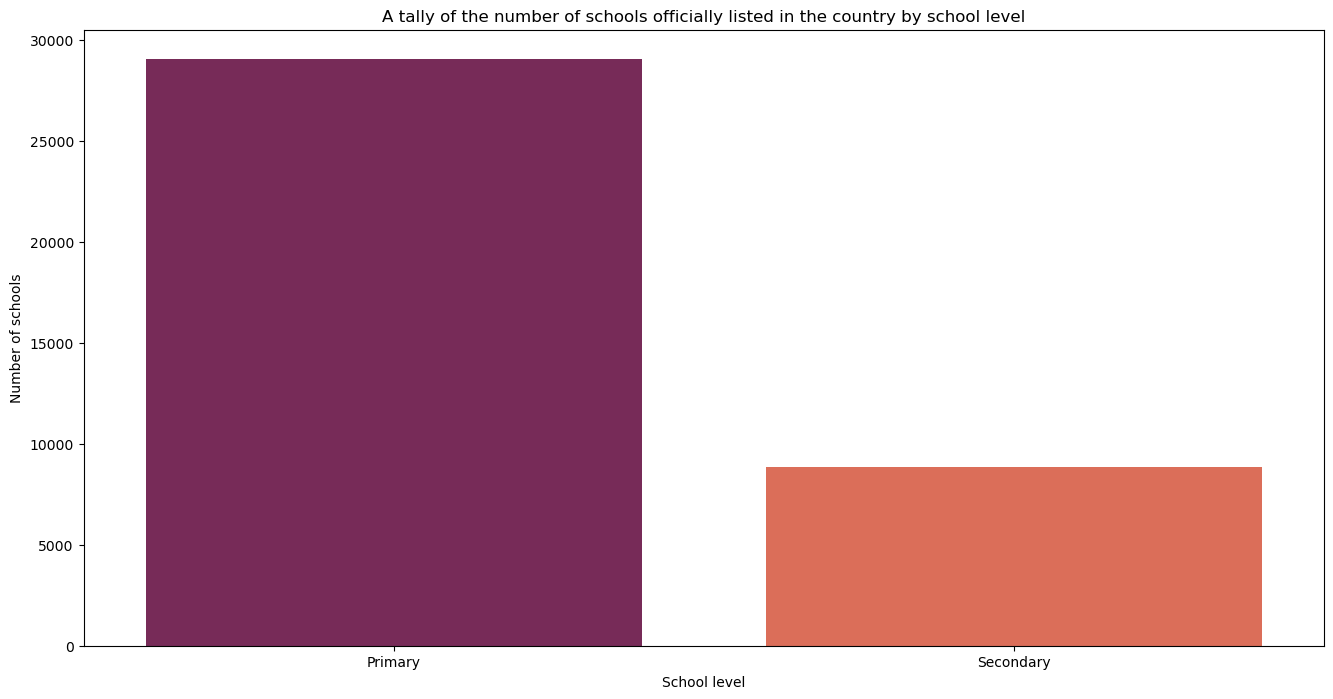

In [50]:
#Okay, we need to see some graphs to look into the number of schools
f, ax = plt.subplots(1, figsize=(16, 8))
g = sns.countplot(data = school_locations_by_county, x='LEVEL', palette='rocket')

plt.xlabel('School level')
plt.ylabel('Number of schools')
plt.title('A tally of the number of schools officially listed in the country by school level')
#Okay, that's interesting - I was well aware that there was a difference, but I didn't think it was this bad

C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'A tally of the number of schools by county')

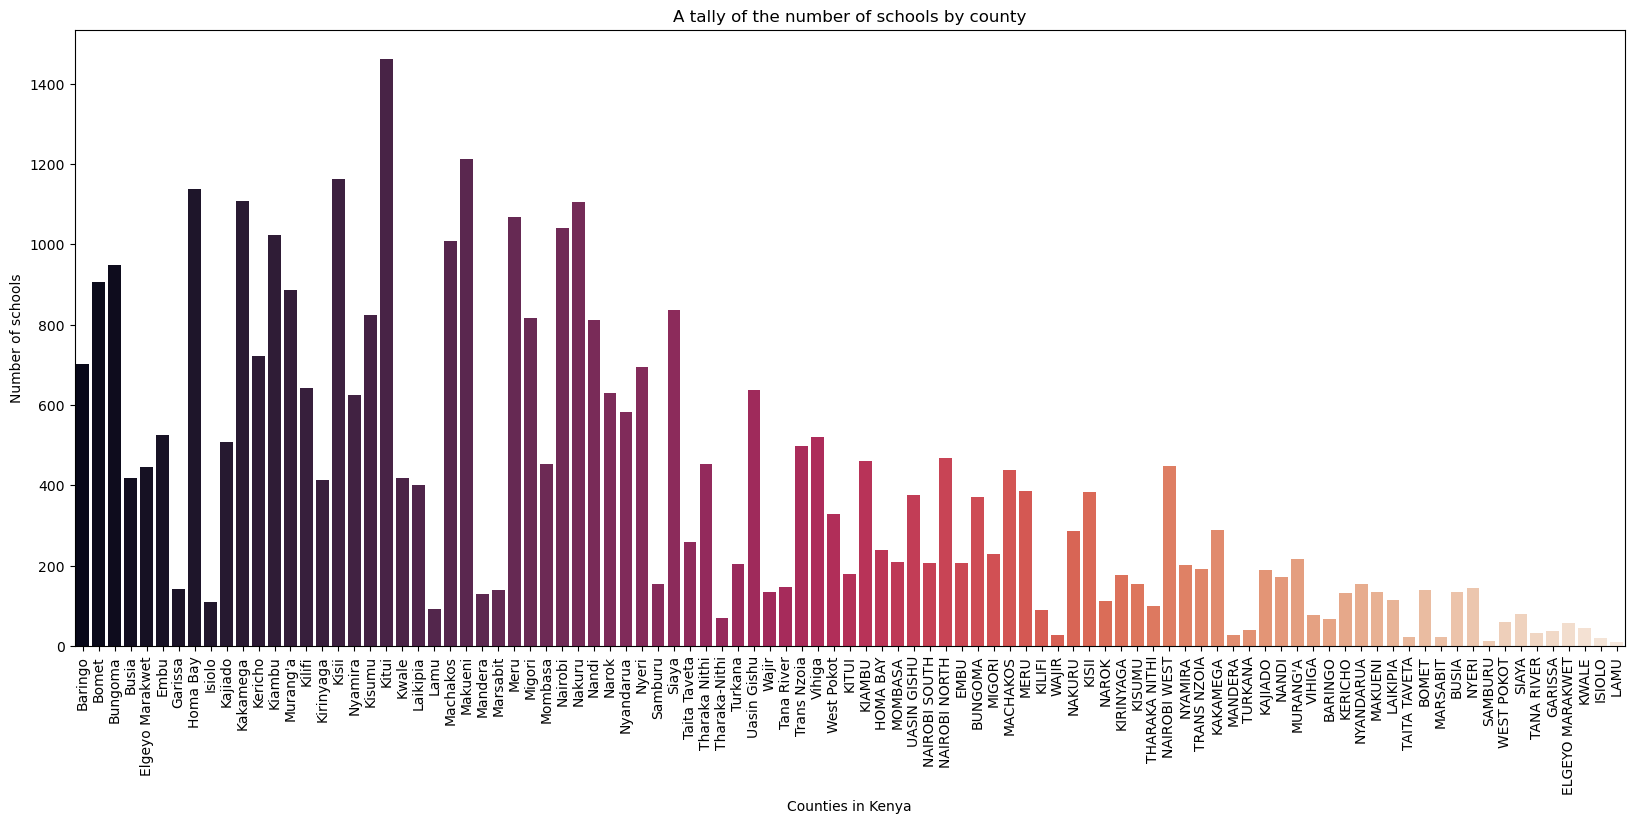

In [51]:
#As expected, there's a glaring difference in the amount of schools from primary to secondary schools
#Let's see how that looks when I count the schools available by county
f, ax = plt.subplots(1, figsize=(20, 8))
county_distibution = sns.countplot(data = school_locations_by_county, x='County', palette='rocket')
county_distibution.set_xticklabels(county_distibution.get_xticklabels(), rotation=90)

plt.xlabel('Counties in Kenya')
plt.ylabel('Number of schools')
plt.title('A tally of the number of schools by county')
#That looks like way too many columns - there's something wrong

In [52]:
#Just to confirm the number of counties in the school dataset, I think there are duplicates
school_locations_by_county['County'].nunique()

97

In [53]:
#Well that's a problem.
#First let's see if changing the strings will help
school_locations_by_county['County'] = school_locations_by_county['County'].str.title()

In [54]:
school_locations_by_county['County'].nunique()
#Okay, I have 4 extra counties
#Looking at the schools yet again reveals that one county had been named 4 times, and one had a hyphen

51

In [55]:
#Time to replace those
school_locations_by_county = school_locations_by_county.replace(['Nairobi South','Nairobi West','Nairobi North'],'Nairobi')
school_locations_by_county = school_locations_by_county.replace(['Tharaka-Nithi'],'Tharaka Nithi')
school_locations_by_county = school_locations_by_county.replace(["Murang'A"],"Murang'a")

In [56]:
school_locations_by_county['County'].nunique()
#Nice, after unifying the string capitalisation, they dropped

47

In [57]:
school_locations_by_county.shape

(37899, 7)

C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'A tally of the number of schools by county')

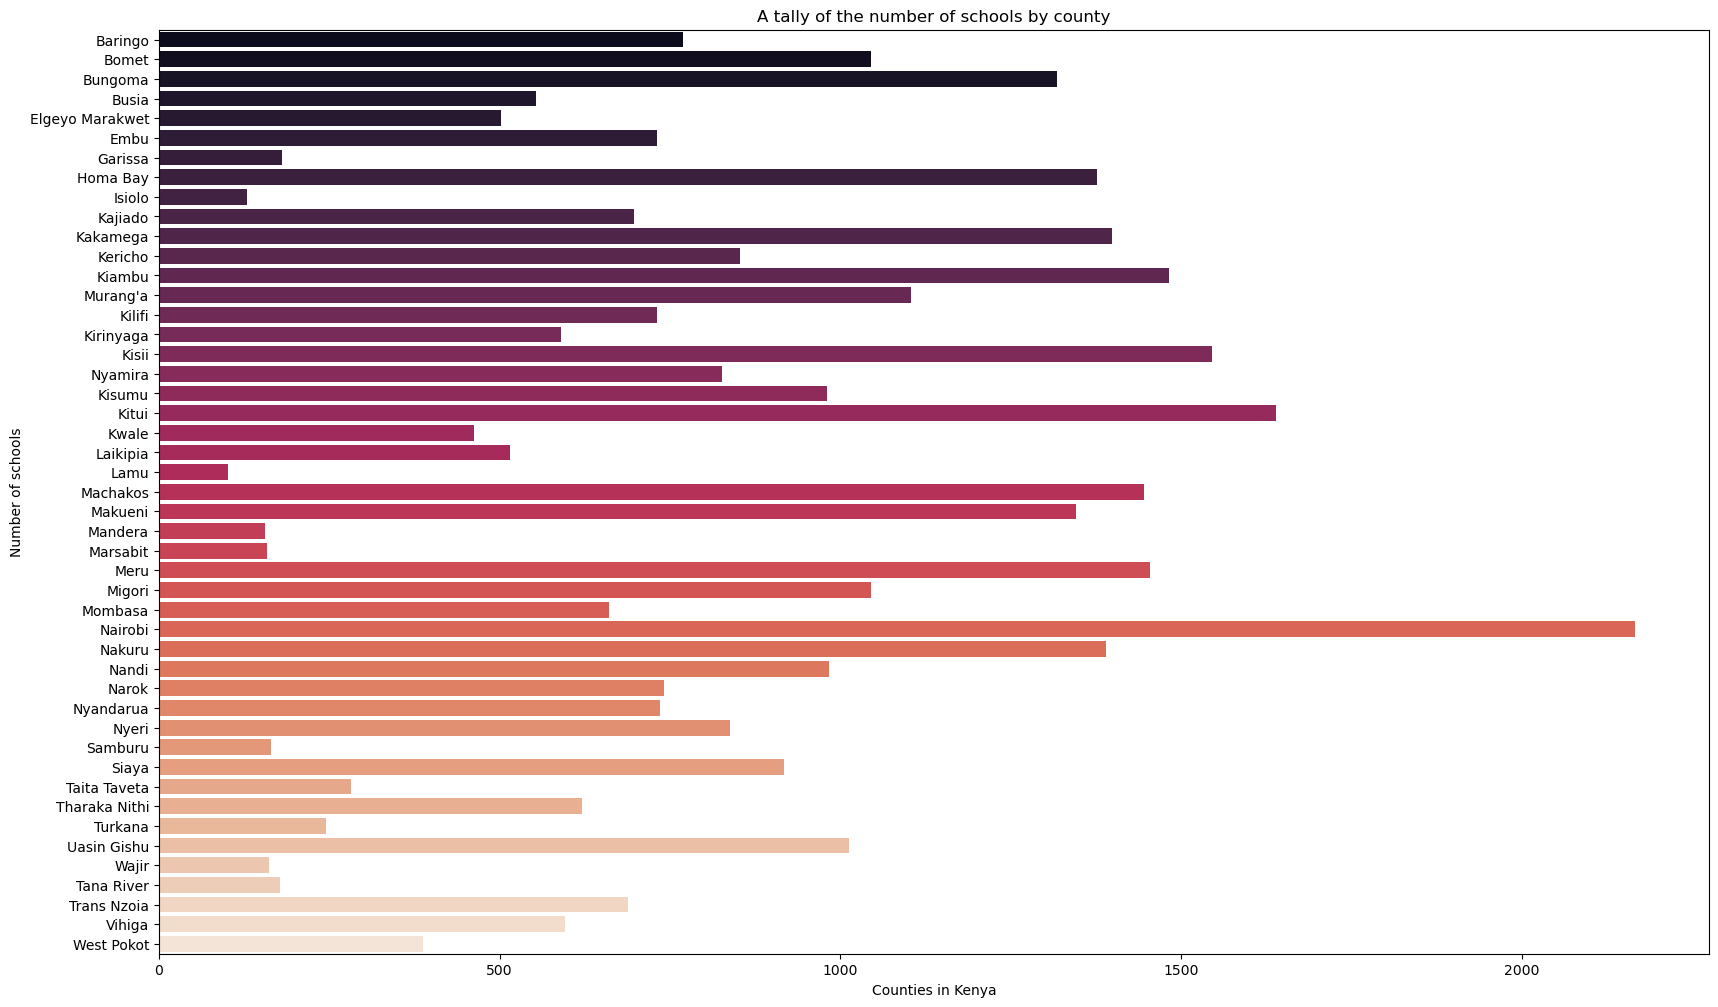

In [58]:
#Plotting the new df now that the duplicates have been removed
f, ax = plt.subplots(1, figsize=(20, 12))
county_distibution = sns.countplot(data = school_locations_by_county, y='County', palette='rocket')

plt.xlabel('Counties in Kenya')
plt.ylabel('Number of schools')
plt.title('A tally of the number of schools by county')

C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'The number of students enrolled in primary school as per the 2019 census data')

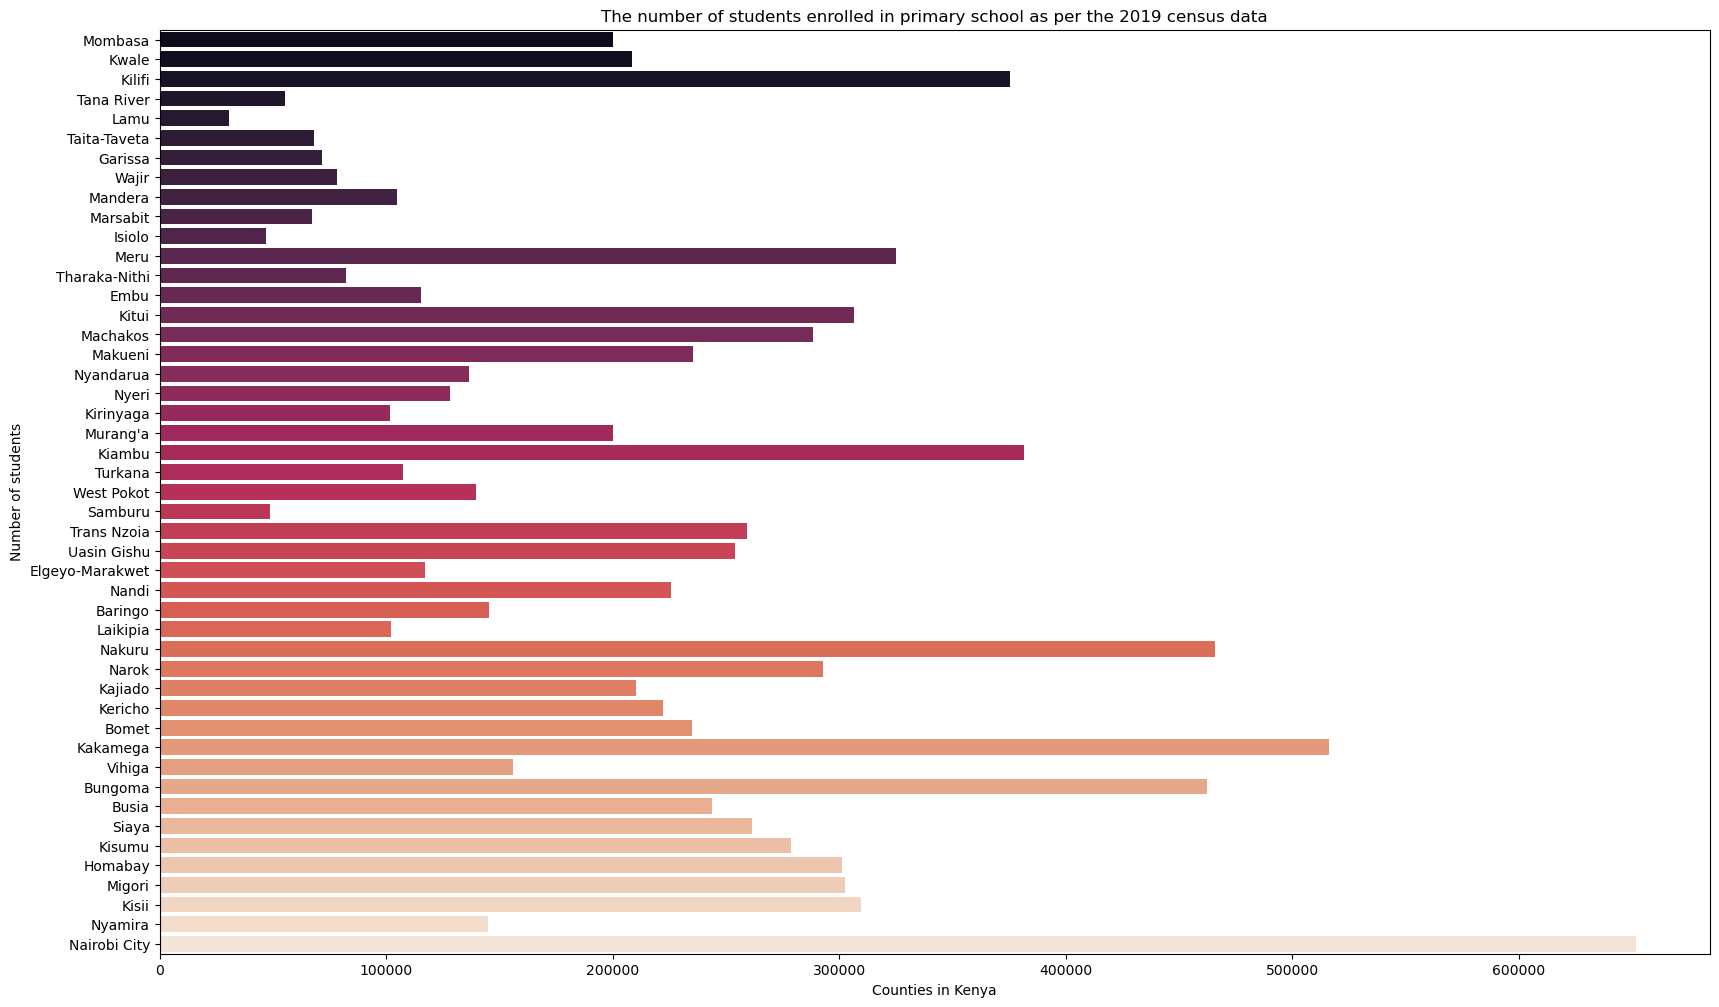

In [59]:
#Quick check on the County labels for the enrollment data

f, ax = plt.subplots(1, figsize=(20, 12))
g = sns.barplot(data = primary_dist, x='2019 Census: Total', y='County',palette='rocket')

plt.xlabel('Counties in Kenya')
plt.ylabel('Number of students')
plt.title('The number of students enrolled in primary school as per the 2019 census data')

In [60]:
#So, our other datasets also have small naming mismatches!
#This will bring issues during the merge stage, so better to find them now
primary_dist = primary_dist.replace(['Nairobi City'],'Nairobi')
secondary_dist = secondary_dist.replace(['Nairobi City'],'Nairobi')
primary_dist = primary_dist.replace(["Homabay"],'Homa Bay')
secondary_dist = secondary_dist.replace(["Homabay"],'Homa Bay')
primary_dist = primary_dist.replace('-',' ',regex=True)
secondary_dist = secondary_dist.replace('-',' ',regex=True)

C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'The number of students enrolled in primary school as per the 2019 census data')

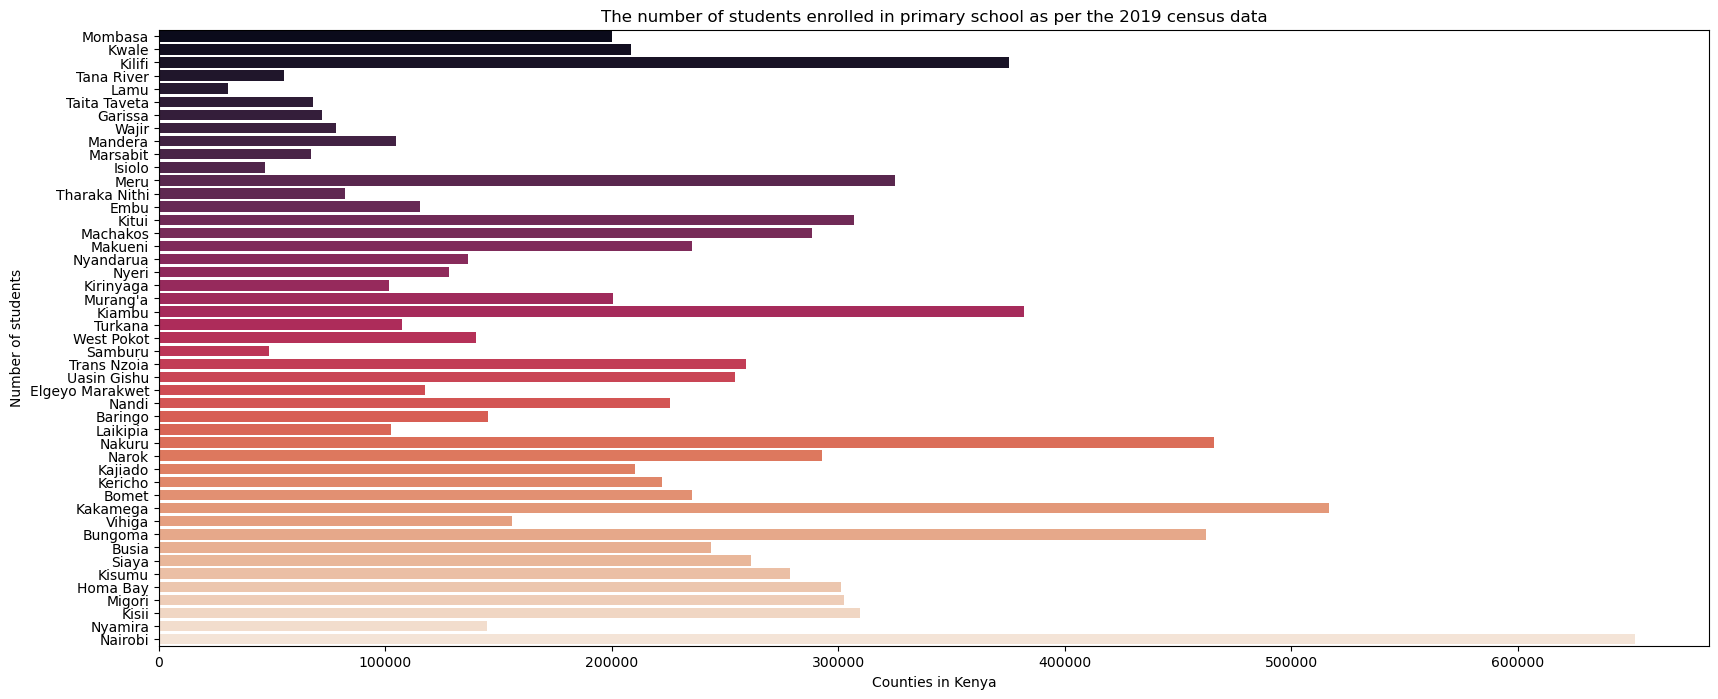

In [61]:
#Looks good

f, ax = plt.subplots(1, figsize=(20, 8))
g = sns.barplot(data = primary_dist, x='2019 Census: Total', y='County',palette='rocket')

plt.xlabel('Counties in Kenya')
plt.ylabel('Number of students')
plt.title('The number of students enrolled in primary school as per the 2019 census data')

C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Population distribution in Kenya')

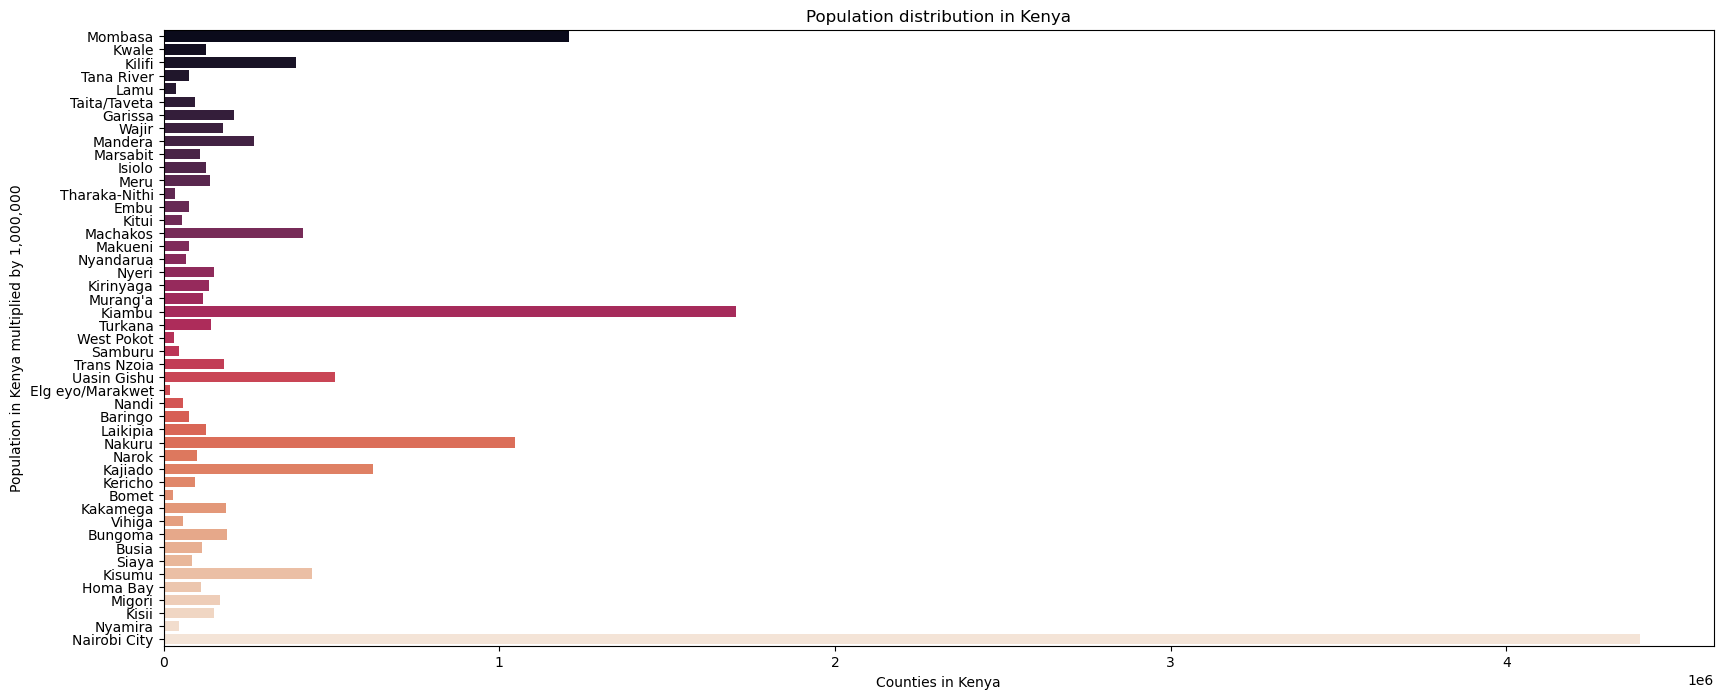

In [62]:
#A check for the population distribution labels as well

f, ax = plt.subplots(1, figsize=(20, 8))
b = sns.barplot(data = pop_distribution, x='Total', y='County',palette='rocket')

plt.xlabel('Counties in Kenya')
plt.ylabel('Population in Kenya multiplied by 1,000,000')
plt.title('Population distribution in Kenya')

In [63]:
#Yep, also had issues
pop_distribution = pop_distribution.replace('-',' ',regex=True)
pop_distribution = pop_distribution.replace('/',' ',regex=True)
pop_distribution = pop_distribution.replace('Nairobi City','Nairobi')

pop_distribution = pop_distribution.replace('Elg eyo Marakwet','Elgeyo Marakwet')

C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Population distribution in Kenya')

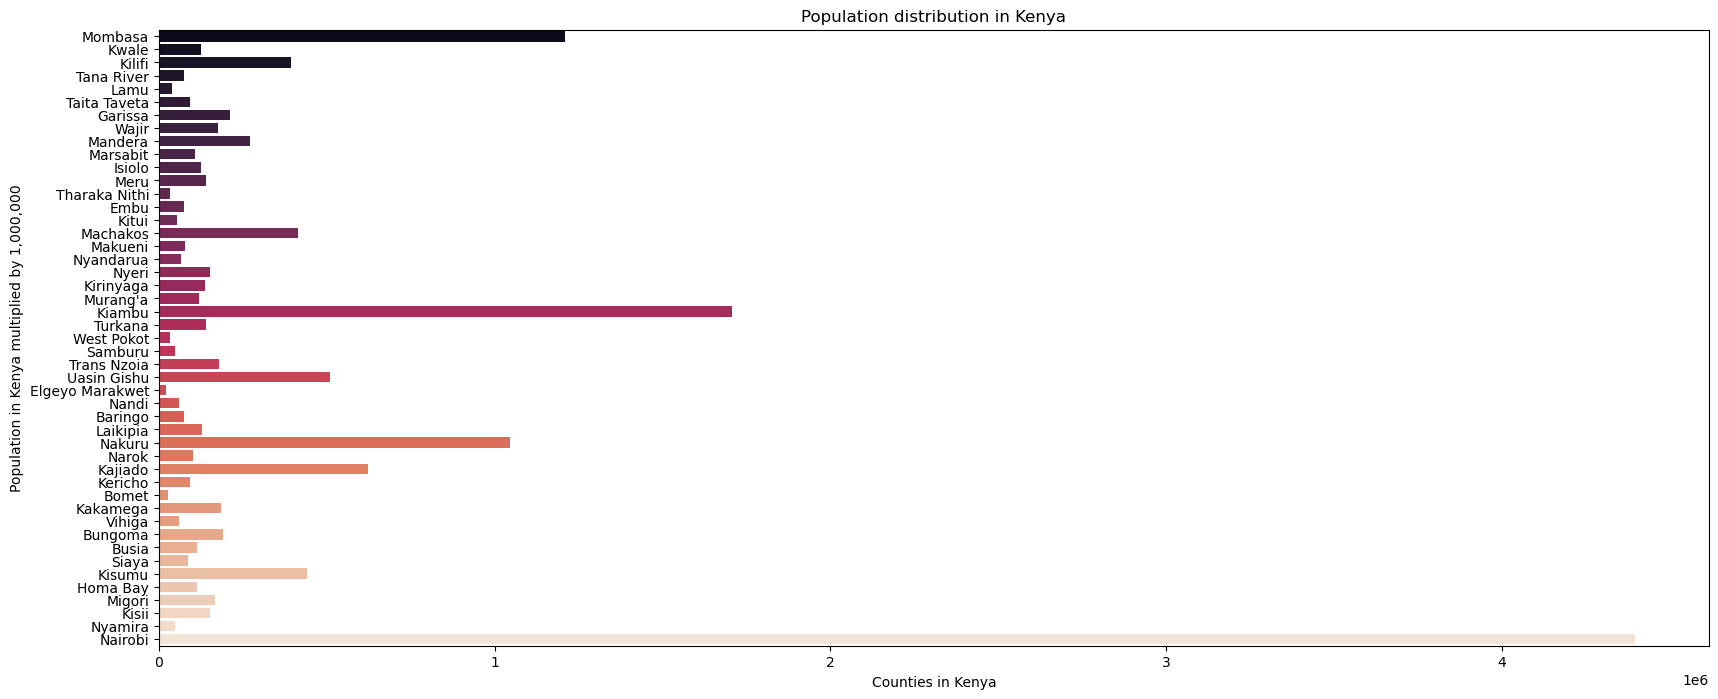

In [64]:
#Final check for the names

f, ax = plt.subplots(1, figsize=(20, 8))
b = sns.barplot(data = pop_distribution, x='Total', y='County',palette='rocket')

plt.xlabel('Counties in Kenya')
plt.ylabel('Population in Kenya multiplied by 1,000,000')
plt.title('Population distribution in Kenya')

In [65]:
#Quick check for the county names in the county shape files
list_counties = county_boundaries['COUNTY'].tolist()

In [66]:
county_boundaries['COUNTY'].nunique()
#First confirming that I have 47 counties

47

In [67]:
list_counties
#Checking that all the names are in order - they are not

['Turkana',
 'Marsabit',
 'Mandera',
 'Wajir',
 'West Pokot',
 'Samburu',
 'Isiolo',
 'Baringo',
 'Keiyo-Marakwet',
 'Trans Nzoia',
 'Bungoma',
 'Garissa',
 'Uasin Gishu',
 'Kakamega',
 'Laikipia',
 'Busia',
 'Meru',
 'Nandi',
 'Siaya',
 'Nakuru',
 'Vihiga',
 'Nyandarua',
 'Tharaka',
 'Kericho',
 'Kisumu',
 'Nyeri',
 'Tana River',
 'Kitui',
 'Kirinyaga',
 'Embu',
 'Homa Bay',
 'Bomet',
 'Nyamira',
 'Narok',
 'Kisii',
 "Murang'a",
 'Migori',
 'Kiambu',
 'Machakos',
 'Kajiado',
 'Nairobi',
 'Makueni',
 'Lamu',
 'Kilifi',
 'Taita Taveta',
 'Kwale',
 'Mombasa']

In [68]:
#Replacing the two inequalities spotted
county_boundaries = county_boundaries.replace(['Keiyo-Marakwet'],'Elgeyo Marakwet')
county_boundaries = county_boundaries.replace(['Tharaka'],'Tharaka Nithi')

In [69]:
list_counties = county_boundaries['COUNTY'].tolist()

In [70]:
list_counties

['Turkana',
 'Marsabit',
 'Mandera',
 'Wajir',
 'West Pokot',
 'Samburu',
 'Isiolo',
 'Baringo',
 'Elgeyo Marakwet',
 'Trans Nzoia',
 'Bungoma',
 'Garissa',
 'Uasin Gishu',
 'Kakamega',
 'Laikipia',
 'Busia',
 'Meru',
 'Nandi',
 'Siaya',
 'Nakuru',
 'Vihiga',
 'Nyandarua',
 'Tharaka Nithi',
 'Kericho',
 'Kisumu',
 'Nyeri',
 'Tana River',
 'Kitui',
 'Kirinyaga',
 'Embu',
 'Homa Bay',
 'Bomet',
 'Nyamira',
 'Narok',
 'Kisii',
 "Murang'a",
 'Migori',
 'Kiambu',
 'Machakos',
 'Kajiado',
 'Nairobi',
 'Makueni',
 'Lamu',
 'Kilifi',
 'Taita Taveta',
 'Kwale',
 'Mombasa']

Text(0.5, 1.0, 'A quick check of the shapefiles of the counties of Kenya')

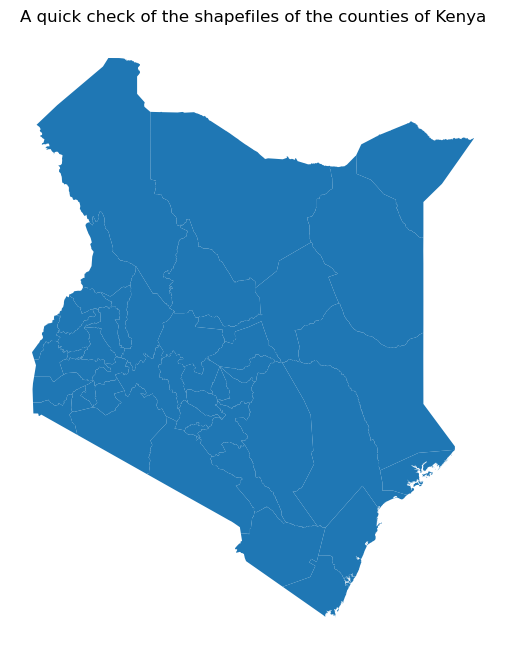

In [71]:
#just checking if they look good
# Plotting the locations
f, ax = plt.subplots(1, figsize=(8, 8))
county_boundaries.plot(ax=ax)
plt.axis('off')
plt.title('A quick check of the shapefiles of the counties of Kenya')

Text(0.5, 1.0, 'A quick check of the shapefiles of Schools in Kenya')

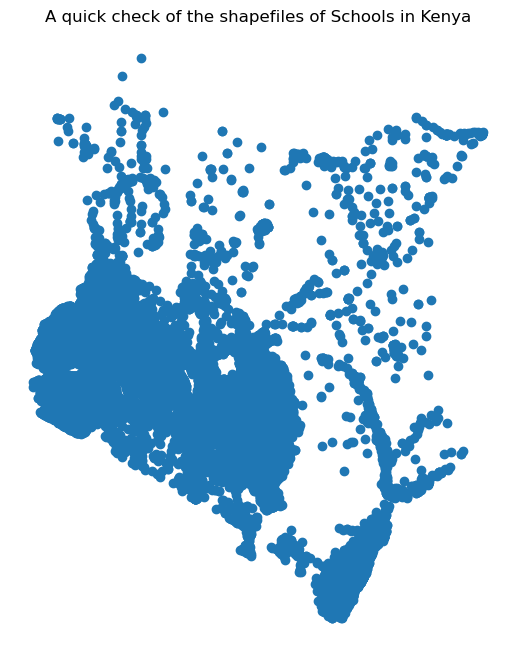

In [72]:
#just checking if they look good
# Plotting the locations
f, ax = plt.subplots(1, figsize=(8, 8))
school_locations.plot(ax=ax)
plt.axis('off')
plt.title('A quick check of the shapefiles of Schools in Kenya')


Once I confirmed that the data was clean and ready for use, I could move on to merge the datasets to create more complex visualisations and plots.


In [73]:
#Now that I've had a quick check of the files that I have available, it's time that I merge them!
#First, I need to split my schools per county dataframe into primary and secondary school dataframes
#This is so that I can work with the enrollment records that I have available for primary and secondary schools
primary_schools = school_locations_by_county.loc[school_locations_by_county['LEVEL']=='Primary']
secondary_schools = school_locations_by_county.loc[school_locations_by_county['LEVEL']=='Secondary']

In [74]:
#Quick checks!
primary_schools['LEVEL'].nunique()

1

In [75]:
#Quick checks!
secondary_schools['LEVEL'].nunique()

1

In [76]:
#Head?
primary_schools.head()

,SCHOOL_NAM,LEVEL,County,X_Coord,Y_Coord,Source,geometry
0,BAKWANIN,Primary,Baringo,35.79708,0.40955,"Ministry of Education, 2016",POINT (143417.238 10045338.886)
1,BEKIBON,Primary,Baringo,35.88406,0.33640,"Ministry of Education, 2016",POINT (153107.652 10037237.735)
2,BOKORIN,Primary,Baringo,35.77177,0.53218,"Ministry of Education, 2016",POINT (140602.763 10058916.014)
3,BOROWONIN,Primary,Baringo,35.77864,0.44487,"Ministry of Education, 2016",POINT (141363.771 10049249.854)
4,BOSIN,Primary,Baringo,35.79545,0.43809,"Ministry of Education, 2016",POINT (143236.887 10048498.462)


In [77]:
#Although the locations of the school would be interesting to use, I require a dataframe that has the number of schools per county
count_primary_schools = primary_schools.value_counts('County').reset_index()

In [78]:
#I need this to have a proper heading
count_primary_schools=count_primary_schools.set_axis(['County','Count of schools'], axis=1)

In [79]:
count_primary_schools.head()
#Quick check!!

,County,Count of schools
0,Nairobi,1701
1,Kitui,1281
2,Kisii,1151
3,Machakos,1102
4,Meru,1080


In [80]:
#Redo for secondary schools
count_secondary_schools = secondary_schools.value_counts('County').reset_index()

In [81]:
#I need this to have a proper heading
count_secondary_schools=count_secondary_schools.set_axis(['County','Count of schools'], axis=1)

In [82]:
count_secondary_schools.head()
#Quick check!!

,County,Count of schools
0,Nairobi,465
1,Nakuru,414
2,Kiambu,410
3,Kisii,394
4,Meru,374


In [83]:
#Time to merge dataframes!!
#One pair at a time. Remember both primary and secondary schools are different
primary_school_stats = pd.merge(primary_dist, count_primary_schools, how='inner', on='County')
secondary_school_stats = pd.merge(secondary_dist, count_secondary_schools, how='inner', on='County')                            

In [84]:
#A quick check to see if the merge went well.
primary_school_stats.tail()

,County,2019 Census: Total,2019 Census: Male,2019 Census: Female,Ministry of Education: Total,Ministry of Education: Male,Ministry of Education: Female,Variation (Percent): Total,Variation (Percent): Male,Variation (Percent): Female,Count of schools
42,Homa Bay,301323,151431,149892,313666,159553,154113,-4.1,-5.4,-2.8,1061
43,Migori,302425,151510,150915,277454,139234,138220,8.3,8.1,8.4,824
44,Kisii,309637,156763,152874,346500,173007,173493,-11.9,-10.4,-13.5,1151
45,Nyamira,144916,73981,70935,162596,80626,81970,-12.2,-9.0,-15.6,627
46,Nairobi,651784,320455,331329,414045,205640,208405,36.5,35.8,37.1,1701


In [85]:
#Quick check
primary_school_stats['County'].nunique()

47

In [86]:
#I want to be able to compare the values with the population distribution.
#So i'll merge the county files with the population distribution files
county_full = pd.merge(county_boundaries, pop_distribution, left_on='COUNTY', right_on='County', how='inner')

In [87]:
#Using an equality test to check if the merge was correct
county_full['COUNTY'].equals(county_full['County'])

True

In [88]:
#A look at the dataset as it is
county_full.head()

,AREA,PERIMETER,COUNTY,Shape_Leng,Shape_Area,geometry,County,Total,Male,Female,Intersex
0,5.677,15.047,Turkana,15.046838,5.676985,"POLYGON ((35.79593 5.34449, 35.79659 5.34468, ...",Turkana,140791,71597,69193,1
1,6.177,11.974,Marsabit,11.974165,6.176831,"POLYGON ((36.05061 4.45622, 36.23184 4.45124, ...",Marsabit,107239,54790,52447,2
2,2.117,7.355,Mandera,7.355154,2.117196,"POLYGON ((41.62133 3.97673, 41.62272 3.97860, ...",Mandera,270467,135548,134909,10
3,4.610,9.838,Wajir,9.838408,4.609589,"POLYGON ((39.31812 3.47197, 39.31956 3.47168, ...",Wajir,177174,94812,82340,22
4,0.740,5.030,West Pokot,5.030271,0.740481,"POLYGON ((35.12745 2.62271, 35.12762 2.62302, ...",West Pokot,31841,15544,16297,0


In [89]:
#Next up, let's merge with the shapefiles
map_primary = pd.merge(county_boundaries, primary_school_stats, left_on='COUNTY', right_on='County', how='inner')
map_secondary = pd.merge(county_boundaries, secondary_school_stats, left_on='COUNTY', right_on='County', how='inner')

In [90]:
map_primary.head()

,AREA,PERIMETER,COUNTY,Shape_Leng,Shape_Area,geometry,County,2019 Census: Total,2019 Census: Male,2019 Census: Female,Ministry of Education: Total,Ministry of Education: Male,Ministry of Education: Female,Variation (Percent): Total,Variation (Percent): Male,Variation (Percent): Female,Count of schools
0,5.677,15.047,Turkana,15.046838,5.676985,"POLYGON ((35.79593 5.34449, 35.79659 5.34468, ...",Turkana,107499,55855,51644,162543,85293,77250,-51.2,-52.7,-49.6,216
1,6.177,11.974,Marsabit,11.974165,6.176831,"POLYGON ((36.05061 4.45622, 36.23184 4.45124, ...",Marsabit,67252,33750,33502,64787,32373,32414,3.7,4.1,3.2,134
2,2.117,7.355,Mandera,7.355154,2.117196,"POLYGON ((41.62133 3.97673, 41.62272 3.97860, ...",Mandera,104585,54796,49789,102503,64676,37827,2.0,-18.0,24.0,120
3,4.610,9.838,Wajir,9.838408,4.609589,"POLYGON ((39.31812 3.47197, 39.31956 3.47168, ...",Wajir,78332,43435,34897,76959,43883,33076,1.8,-1.0,5.2,137
4,0.740,5.030,West Pokot,5.030271,0.740481,"POLYGON ((35.12745 2.62271, 35.12762 2.62302, ...",West Pokot,139839,70158,69681,195379,98769,96610,-39.7,-40.8,-38.6,326


In [91]:
map_primary['County'].nunique()
#A quick check to make sure that I have 47 counties!!!

47

I could do a lot of visualisations here, but I think we'll start off with a side by side comparison of enrollment by the 2019 census first

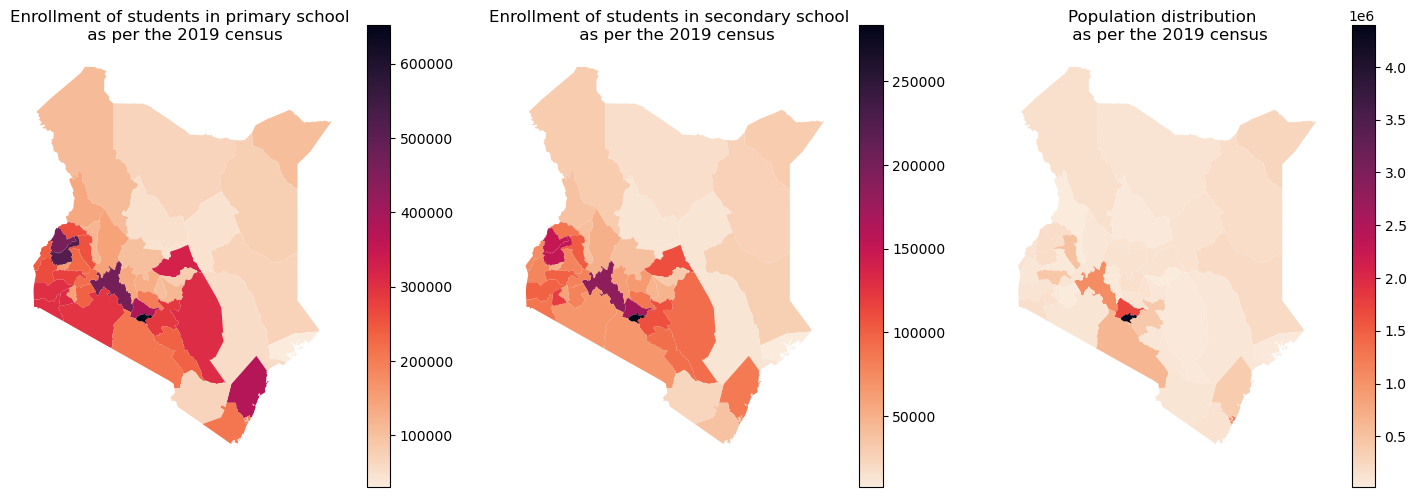

In [92]:
#Okay, time for the fun bit, more visualisations!
#Direct comparison of enrollment
f,ax = plt.subplots(1,3, figsize=(18,6))

#Primary enrollment as per the census
map_primary.plot(ax=ax[0], column ='2019 Census: Total', legend=True, cmap='rocket_r')

#Secondary enrollment as per the census
map_secondary.plot(ax=ax[1], column ='2019 Census: Total', legend=True, cmap='rocket_r')

#Secondary enrollment as per the census
county_full.plot(ax=ax[2], column ='Total', legend=True, cmap='rocket_r')

# Titles
ax[0].set_title('Enrollment of students in primary school \n as per the 2019 census')
ax[1].set_title('Enrollment of students in secondary school  \n as per the 2019 census')
ax[2].set_title('Population distribution  \n as per the 2019 census')

#Remove the axis
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

# Plot
plt.show()

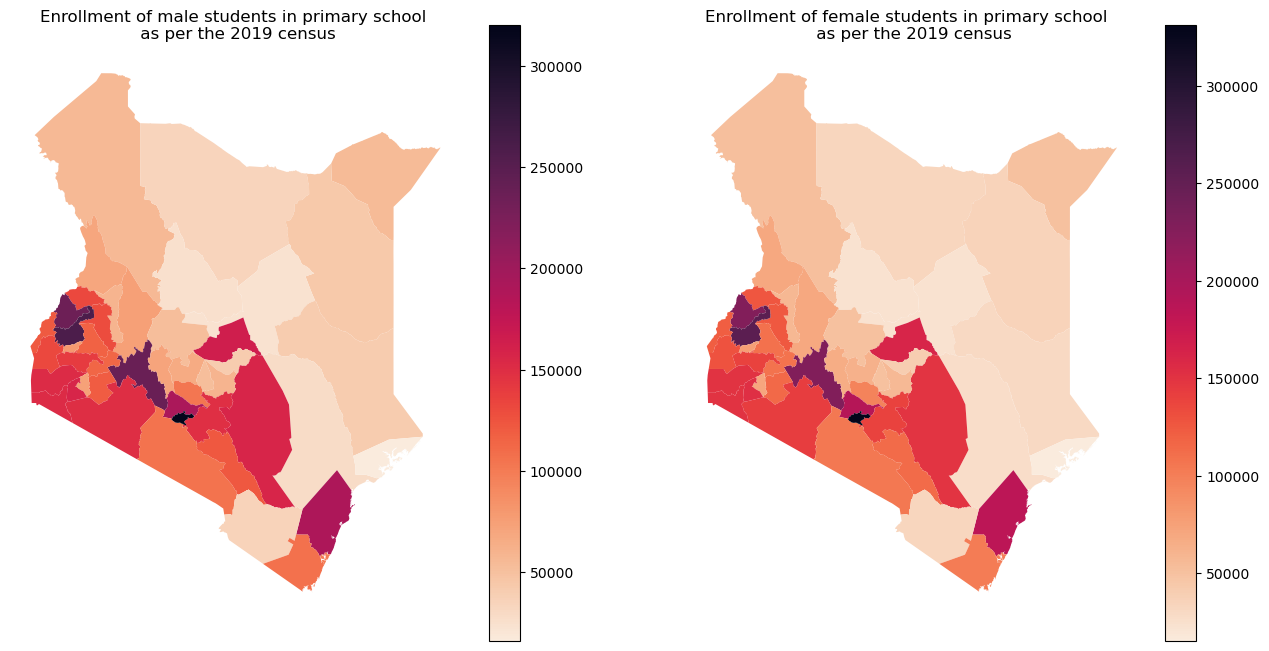

In [93]:
#What about male vs female enrollment?
f,ax = plt.subplots(1,2, figsize=(16,8))

#Male enrollment in primary school as per the census
map_primary.plot(ax=ax[0], column ='2019 Census: Male', legend=True, cmap='rocket_r')

#Female enrollment in primary school as per the census
map_primary.plot(ax=ax[1], column ='2019 Census: Female', legend=True, cmap='rocket_r')

# Titles
ax[0].set_title('Enrollment of male students in primary school \n as per the 2019 census')
ax[1].set_title('Enrollment of female students in primary school  \n as per the 2019 census')

#Remove the axis
ax[0].set_axis_off()
ax[1].set_axis_off()

# Plot
plt.show()

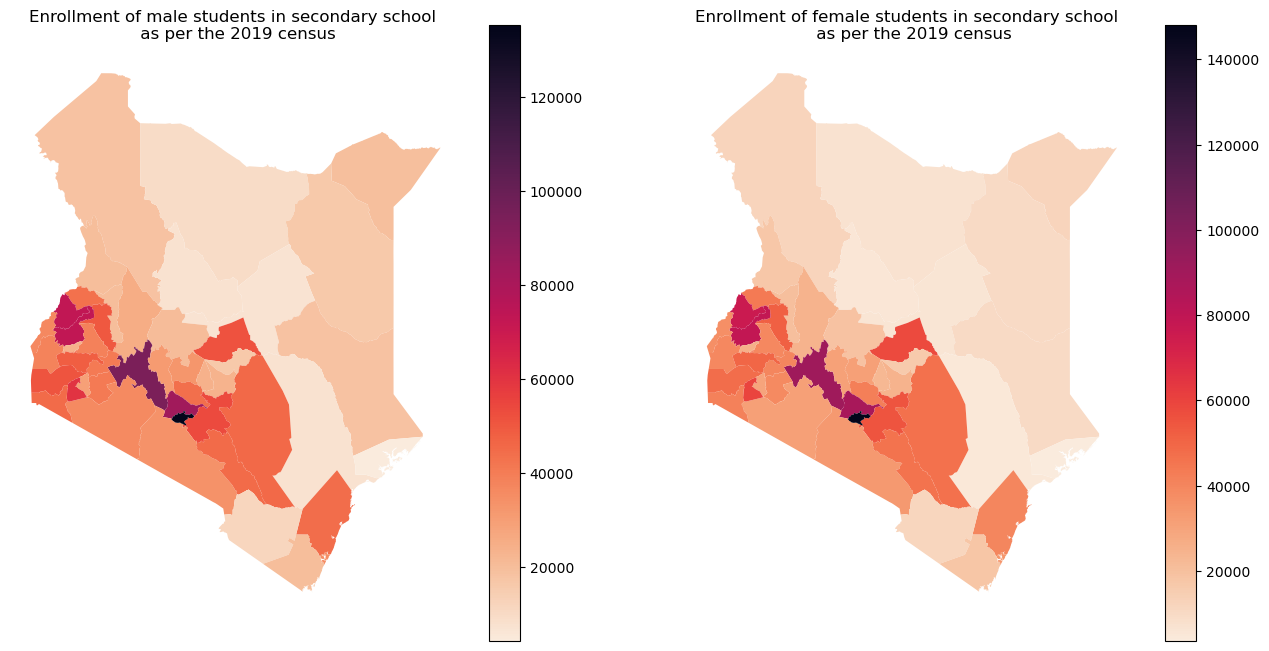

In [94]:
#What about male vs female enrollment?
f,ax = plt.subplots(1,2, figsize=(16,8))

#Male enrollment in secondary school as per the census
map_secondary.plot(ax=ax[0], column ='2019 Census: Male', legend=True, cmap='rocket_r')

#Female enrollment in secondary school as per the census
map_secondary.plot(ax=ax[1], column ='2019 Census: Female', legend=True, cmap='rocket_r')

# Titles
ax[0].set_title('Enrollment of male students in secondary school \n as per the 2019 census')
ax[1].set_title('Enrollment of female students in secondary school  \n as per the 2019 census')

#Remove the axis
ax[0].set_axis_off()
ax[1].set_axis_off()

# Plot
plt.show()

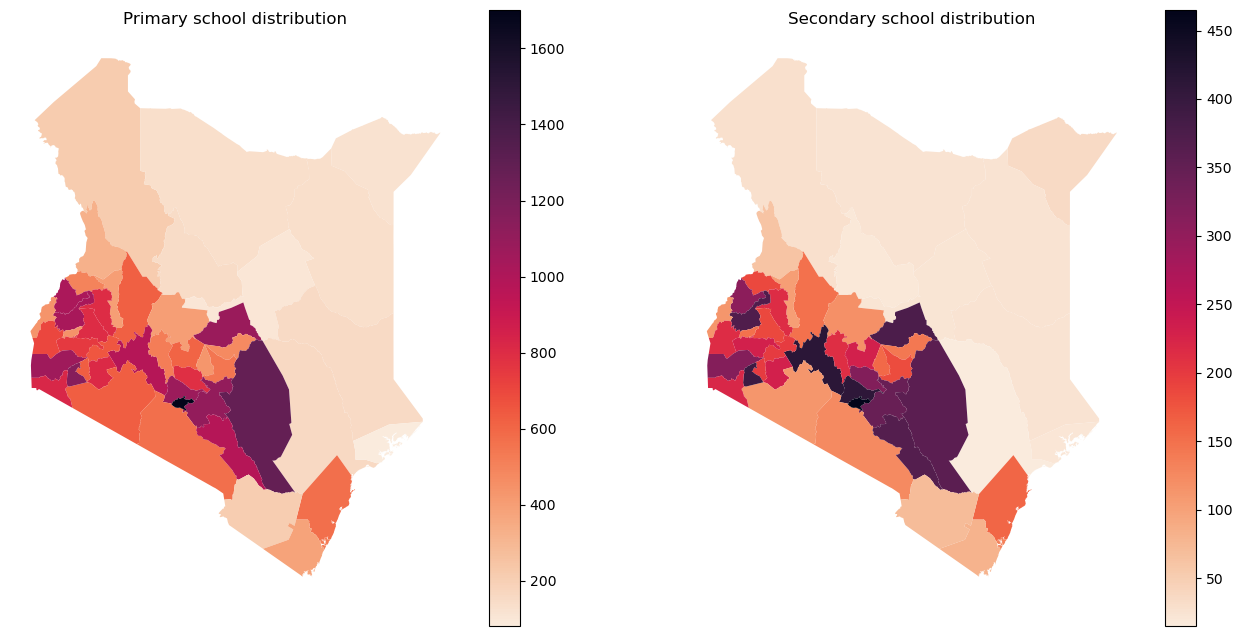

In [95]:
#What about school distribution??
f,ax = plt.subplots(1,2, figsize=(16,8))

#Schools in primary school
map_primary.plot(ax=ax[0], column ='Count of schools', legend=True, cmap='rocket_r')

#Schools in secondary school
map_secondary.plot(ax=ax[1], column ='Count of schools', legend=True, cmap='rocket_r')

# Titles
ax[0].set_title('Primary school distribution')
ax[1].set_title('Secondary school distribution')

#Remove the axis
ax[0].set_axis_off()
ax[1].set_axis_off()

# Plot
plt.show()

The maps that we've plotted so far have given as a clue on where to start our analysis. We can see that a higher number of students and schools are concentrated in the central and western parts of Kenya, which could indicate that there is less investment in schools in the arid and semi-arid areas of Kenya (citation here). We can also observe from the legends that we have a lower number of students in secondary school as compared to primary school.

We can further transform the data that we have available to see the average number of students per school, and see the difference between male and female enrollment by county. This would give us a better idea of how well equipped the system is.

In [96]:
map_primary.head(2)

,AREA,PERIMETER,COUNTY,Shape_Leng,Shape_Area,geometry,County,2019 Census: Total,2019 Census: Male,2019 Census: Female,Ministry of Education: Total,Ministry of Education: Male,Ministry of Education: Female,Variation (Percent): Total,Variation (Percent): Male,Variation (Percent): Female,Count of schools
0,5.677,15.047,Turkana,15.046838,5.676985,"POLYGON ((35.79593 5.34449, 35.79659 5.34468, ...",Turkana,107499,55855,51644,162543,85293,77250,-51.2,-52.7,-49.6,216
1,6.177,11.974,Marsabit,11.974165,6.176831,"POLYGON ((36.05061 4.45622, 36.23184 4.45124, ...",Marsabit,67252,33750,33502,64787,32373,32414,3.7,4.1,3.2,134


In [97]:
#Find the difference between male and female enrollment, and calculate the number of students per school
#For primary school
map_primary['2019 Census: Gender difference'] = map_primary['2019 Census: Male'] - map_primary['2019 Census: Female']
map_primary['2019 Census: Avg students per school'] = map_primary['2019 Census: Total'] / map_primary['Count of schools']

#For secondary schools
map_secondary['2019 Census: Gender difference'] = map_secondary['2019 Census: Male'] - map_secondary['2019 Census: Female']
map_secondary['2019 Census: Avg students per school'] = map_secondary['2019 Census: Total'] /map_secondary['Count of schools']

Here, I changed the colour palette from a sequential colour palette to a diverging colour palette. This allows for better visualisation of values that might diverge in two opposite directions in a plot. The coolwarm palette is colour blind friendly as the values change appropriately in greyscale, and they avoid the use of red and green within the same plot.

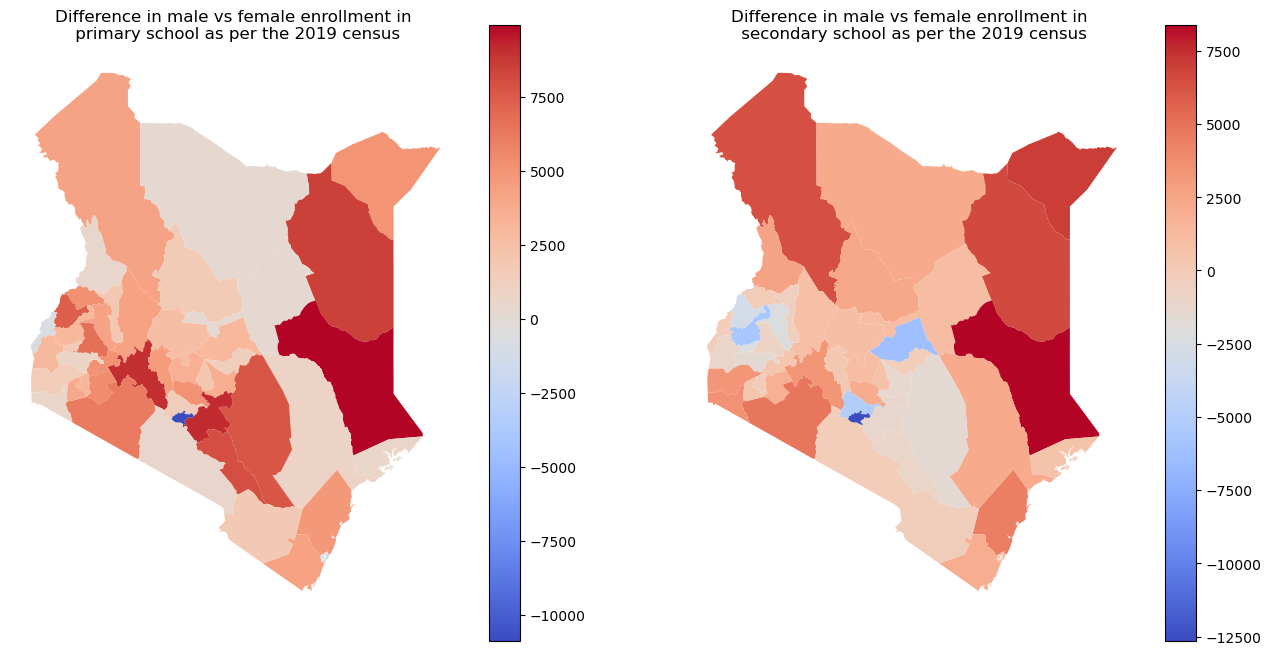

In [98]:
#Okay, so time to plot them out! How does the difference in enrollment look like?
#What about male vs female enrollment?
f,ax = plt.subplots(1,2, figsize=(16,8))

#Difference in male vs female enrollment in primary school
map_primary.plot(ax=ax[0], column ='2019 Census: Gender difference', legend=True, cmap='coolwarm')

#Difference in male vs female enrollment in secondary school
map_secondary.plot(ax=ax[1], column ='2019 Census: Gender difference', legend=True, cmap='coolwarm')

# Titles
ax[0].set_title('Difference in male vs female enrollment in \n primary school as per the 2019 census')
ax[1].set_title('Difference in male vs female enrollment in \n secondary school as per the 2019 census')

#Remove the axis
ax[0].set_axis_off()
ax[1].set_axis_off()

# Plot
plt.show()

In [99]:
#Okay, I need to create my colour map values
diverge_one =  ['tomato' if i >= 0 else 'deepskyblue' for i in map_primary['2019 Census: Gender difference']]
diverge_two =  ['tomato' if i >= 0 else 'deepskyblue' for i in map_secondary['2019 Census: Gender difference']]

C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

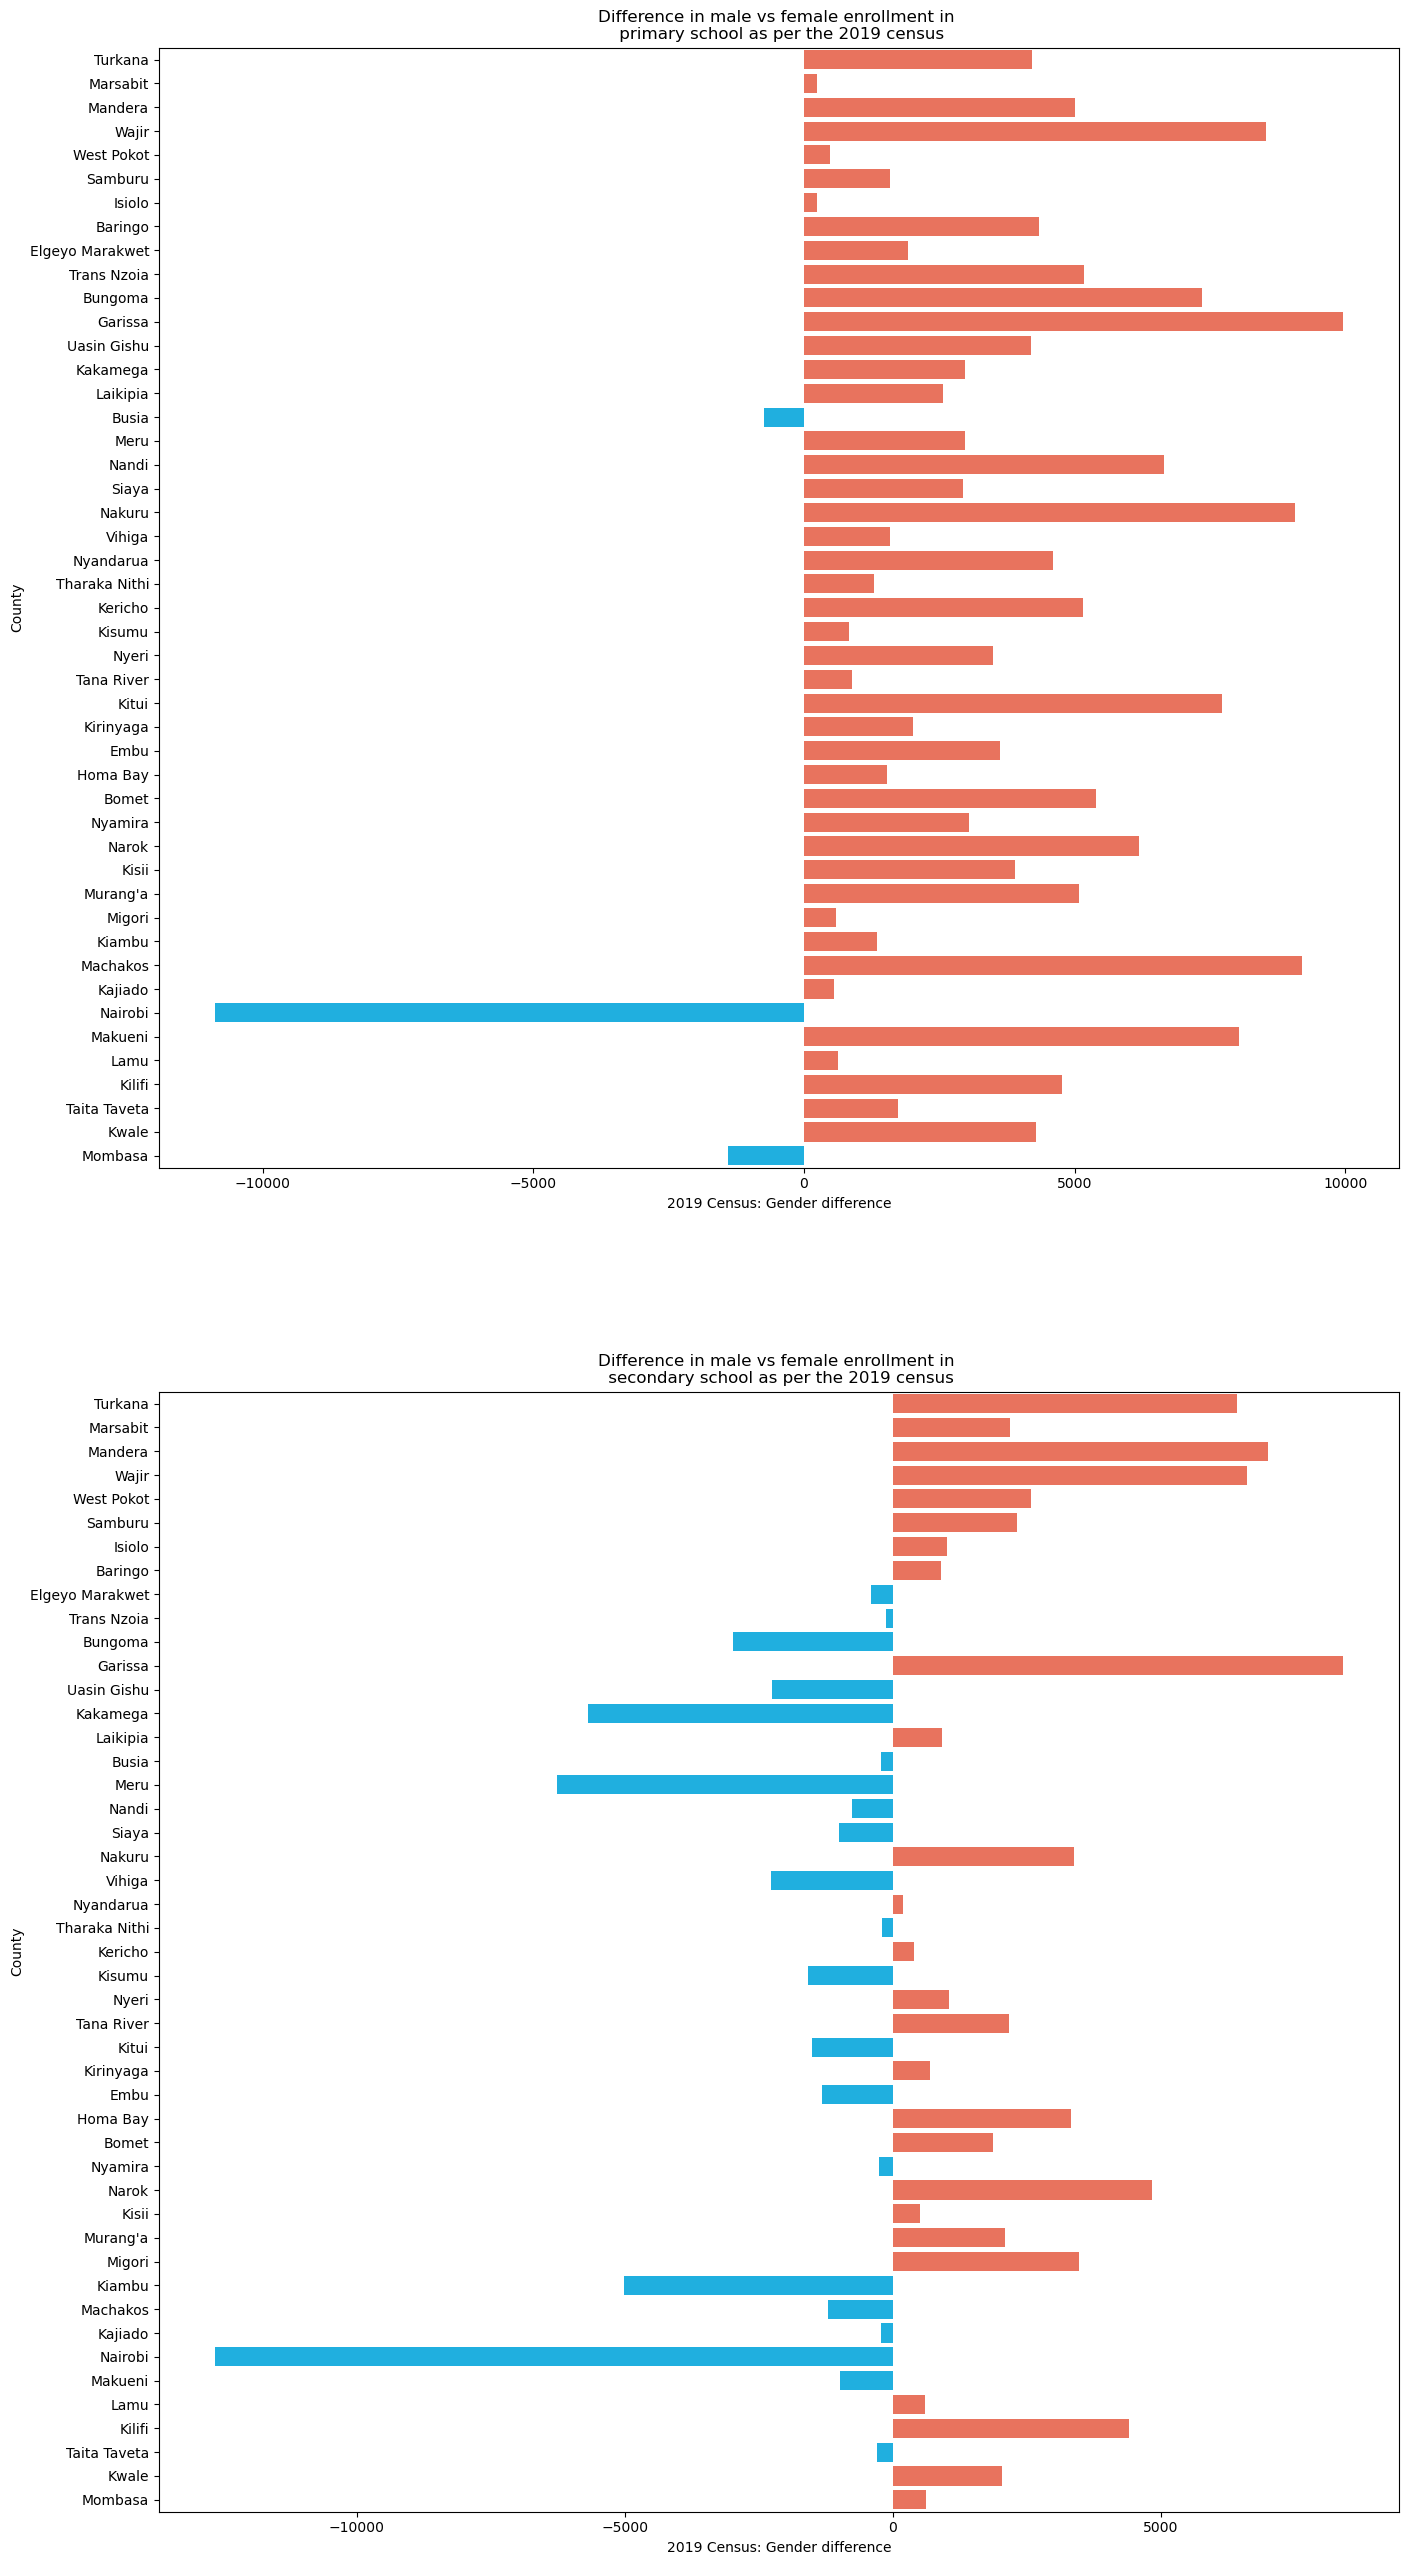

In [100]:
#Okay, so time to plot them out! How does the difference in enrollment look like?
#What about male vs female enrollment?
f,ax = plt.subplots(2,1, figsize=(16,32))

#Difference in male vs female enrollment in primary school
c=sns.barplot(data=map_primary, x='2019 Census: Gender difference', y='County',ax=ax[0], palette=diverge_one)

#Difference in male vs female enrollment in secondary school
d=sns.barplot(data=map_secondary,x='2019 Census: Gender difference', y='County', ax=ax[1],palette=diverge_two)

# Titles
ax[0].set_title('Difference in male vs female enrollment in \n primary school as per the 2019 census')
ax[1].set_title('Difference in male vs female enrollment in \n secondary school as per the 2019 census')


# Plot
plt.show()

From the graphs, we can see that the enrollment of male students in primary schools tends to be higher than that of the enrollment of female students. This is quite the surprise, as the government has greatly subsidised the provision of primary school education () therefore one would expect less 
Nairobi is an outlier in both primary and secondary enrollment for female students, which requires more analysis at a later date.
What about the average number of students?
For this visualisation, I opted to switch back to a sequential palette, which would allow for the viewer to see the differences betwen regions. The palette used was the reversed rocket palette which is colourblind friendly as it is a monochrome palette with great variation in  greyscale.

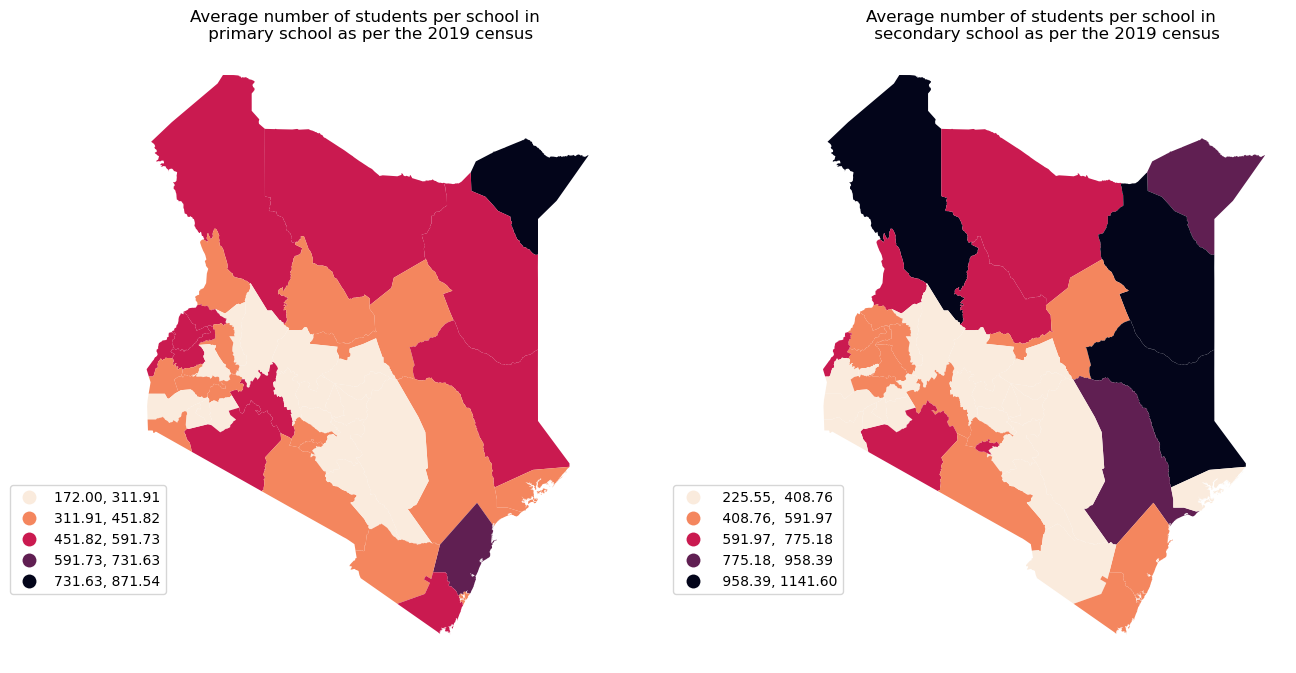

In [101]:
#Okay, so time to plot them out! How does average number of students per school look like?
f,ax = plt.subplots(1,2, figsize=(16,8))

#Average number of students per school in primary school
map_primary.plot(ax=ax[0], column ='2019 Census: Avg students per school', legend=True, scheme='equal_interval',cmap='rocket_r')

#Average number of students per school in secondary school
map_secondary.plot(ax=ax[1], column ='2019 Census: Avg students per school', legend=True, scheme='equal_interval',cmap='rocket_r')

# Titles
ax[0].set_title('Average number of students per school in \n primary school as per the 2019 census')
ax[1].set_title('Average number of students per school in \n secondary school as per the 2019 census')

#Remove the axis
ax[0].set_axis_off()
ax[1].set_axis_off()

#Move the legend
ax[0].get_legend().set_bbox_to_anchor((.10, .3))
ax[1].get_legend().set_bbox_to_anchor((.10, .3))

# Plot
plt.show()

This shows us that we have a large infrastructure shortage in the northern and north eastern part of Kenya, as well as along the coast. Could this lack have an impact on the enrollment?

## Modelling
I chose a linear regression model to see the impact of the number of schools on school enrollment. The predictor variable is the number of schools available in the county, and the predicted variable is the total number of enrolled students.

In [102]:
#Step 1! We choose our x and y, and split our data into two sets:
#The training and test sets
X = map_primary[['Count of schools']]
y = map_primary['2019 Census: Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [103]:
# Fit the model
model = sm.OLS(y_train, X_train).fit()

predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     2019 Census: Total   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              447.5
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                    6.77e-22
Time:                        13:09:40   Log-Likelihood:                         -465.90
No. Observations:                  37   AIC:                                      933.8
Df Residuals:                      36   BIC:                                      935.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Count of schools   354.4587     16.755     21.155      0.000     320.477     388.440
==============================================================================
Omnibus:                        1.397   Durbin-Watson:                   2.207
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                1.346
Skew:                           0.414   Prob(JB):                        0.510
Kurtosis:                       2.565   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Okay, so our R^2 value informs us that the model fits our data relatively well, as it can explain 92.6% of the variability. The p value approaches zero (3.28 e-22) which shows that there is a relationship between these values.

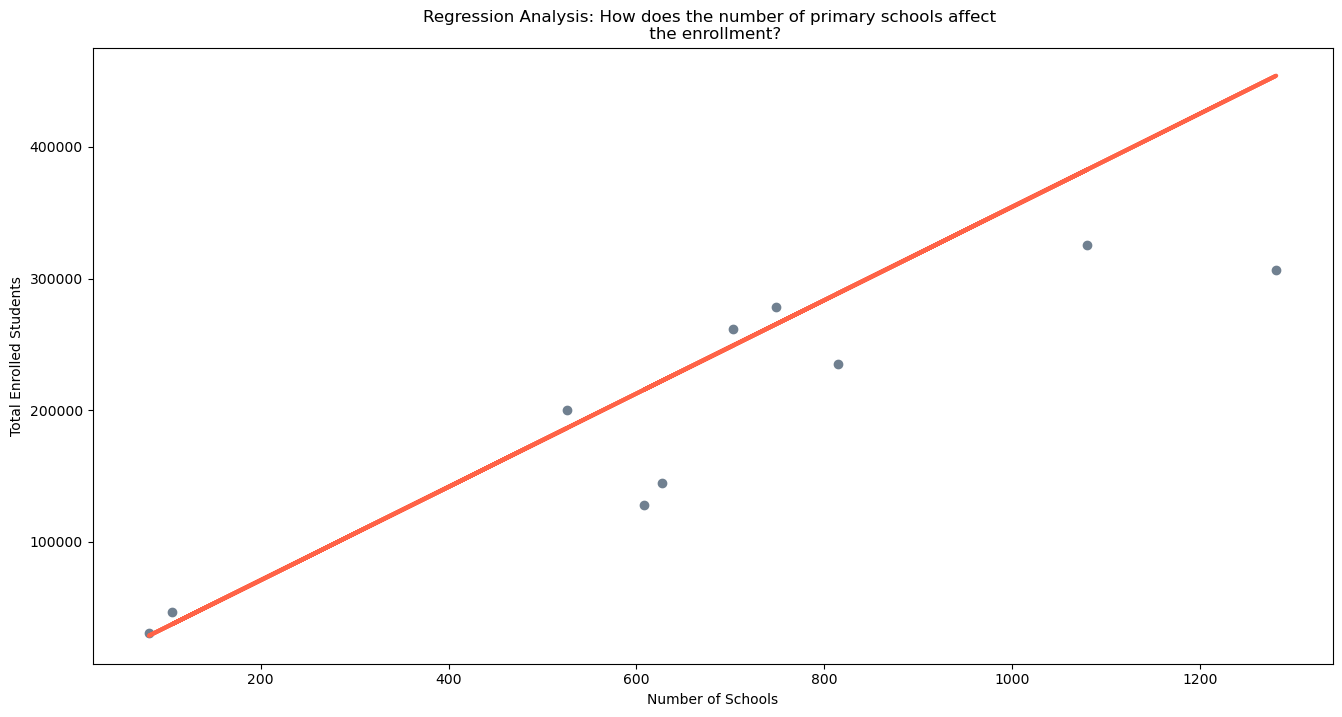

In [104]:
#Visualise our regression line
f,ax = plt.subplots(1, figsize=(16,8))

plt.scatter(X_test, y_test, color='slategrey')
plt.plot(X_test, predictions, color='tomato', linewidth=3)
plt.xlabel('Number of Schools')
plt.ylabel('Total Enrolled Students')
plt.title('Regression Analysis: How does the number of primary schools affect \n the enrollment?')
plt.show()

In [105]:
#We can redo this for the secondary schools
#The training and test sets
A = map_secondary[['Count of schools']]
b = map_secondary['2019 Census: Total']
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.2)

In [106]:
# Fit the model
model = sm.OLS(b_train, A_train).fit()

predictions_b = model.predict(A_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     2019 Census: Total   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              387.8
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                    7.30e-21
Time:                        13:09:41   Log-Likelihood:                         -429.80
No. Observations:                  37   AIC:                                      861.6
Df Residuals:                      36   BIC:                                      863.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Count of schools   385.1901     19.560     19.693      0.000     345.520     424.860
==============================================================================
Omnibus:                       16.831   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.187
Skew:                           1.067   Prob(JB):                     2.79e-07
Kurtosis:                       6.877   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

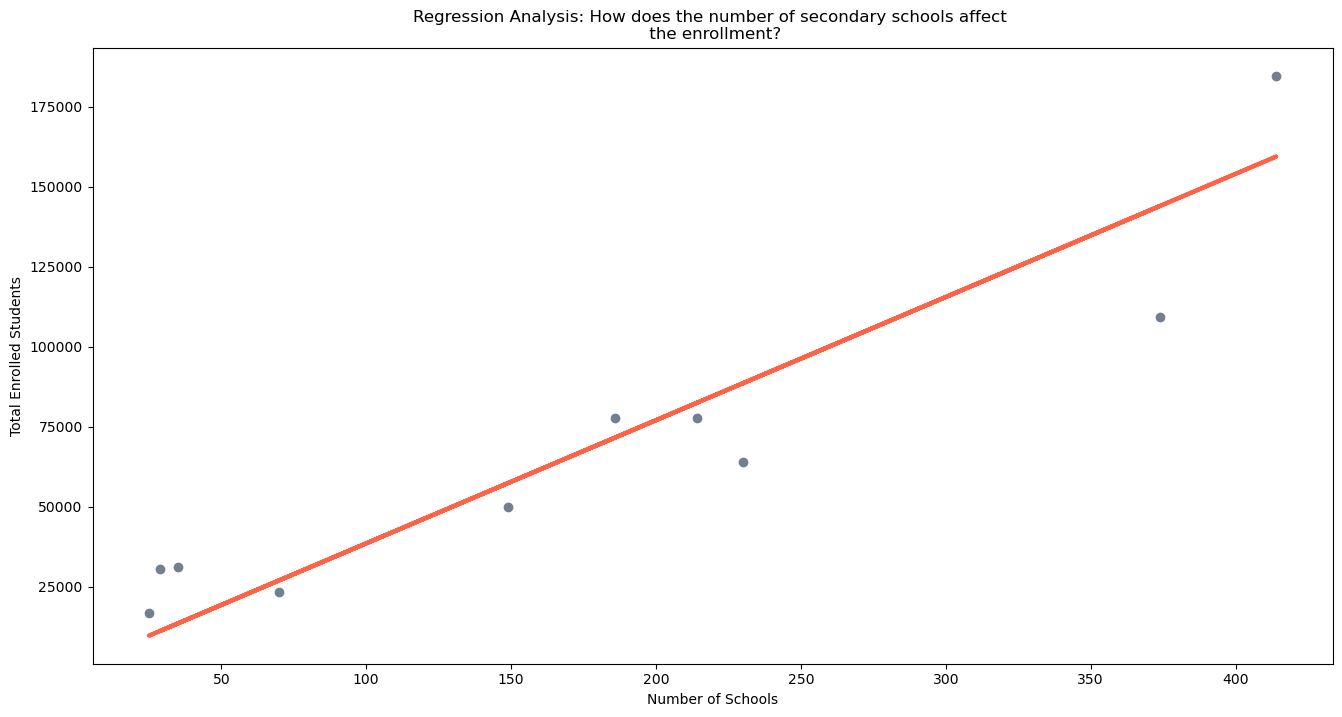

In [107]:
#Visualise our regression line
f,ax = plt.subplots(1, figsize=(16,8))

plt.scatter(A_test, b_test, color='slategrey')
plt.plot(A_test, predictions_b, color='tomato', linewidth=3)
plt.xlabel('Number of Schools')
plt.ylabel('Total Enrolled Students')
plt.title('Regression Analysis: How does the number of secondary schools affect \n the enrollment?')
plt.show()

Okay, so our R^2 value informs us that the model fits our data relatively well, as it can explain 91.5% of the variability. The p value approaches zero (7.30 e-21) which shows that there is a relationship between these values.

## Data Visualisation
These are the two visualisations I chose to submit. The visualisations are aimed towards policy makers to draw attention to education deserts in order to direct resources to counties that need more school infrastructure. For the non-spatial visualisation I chose to show the difference in school enrollment in male and female students. The bars are horizontal instaed of vertical for easier viewing, and the colours chosen are colour blind friendly.

C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gyrmo\AppData\Local\anaconda3\envs\final_assignment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

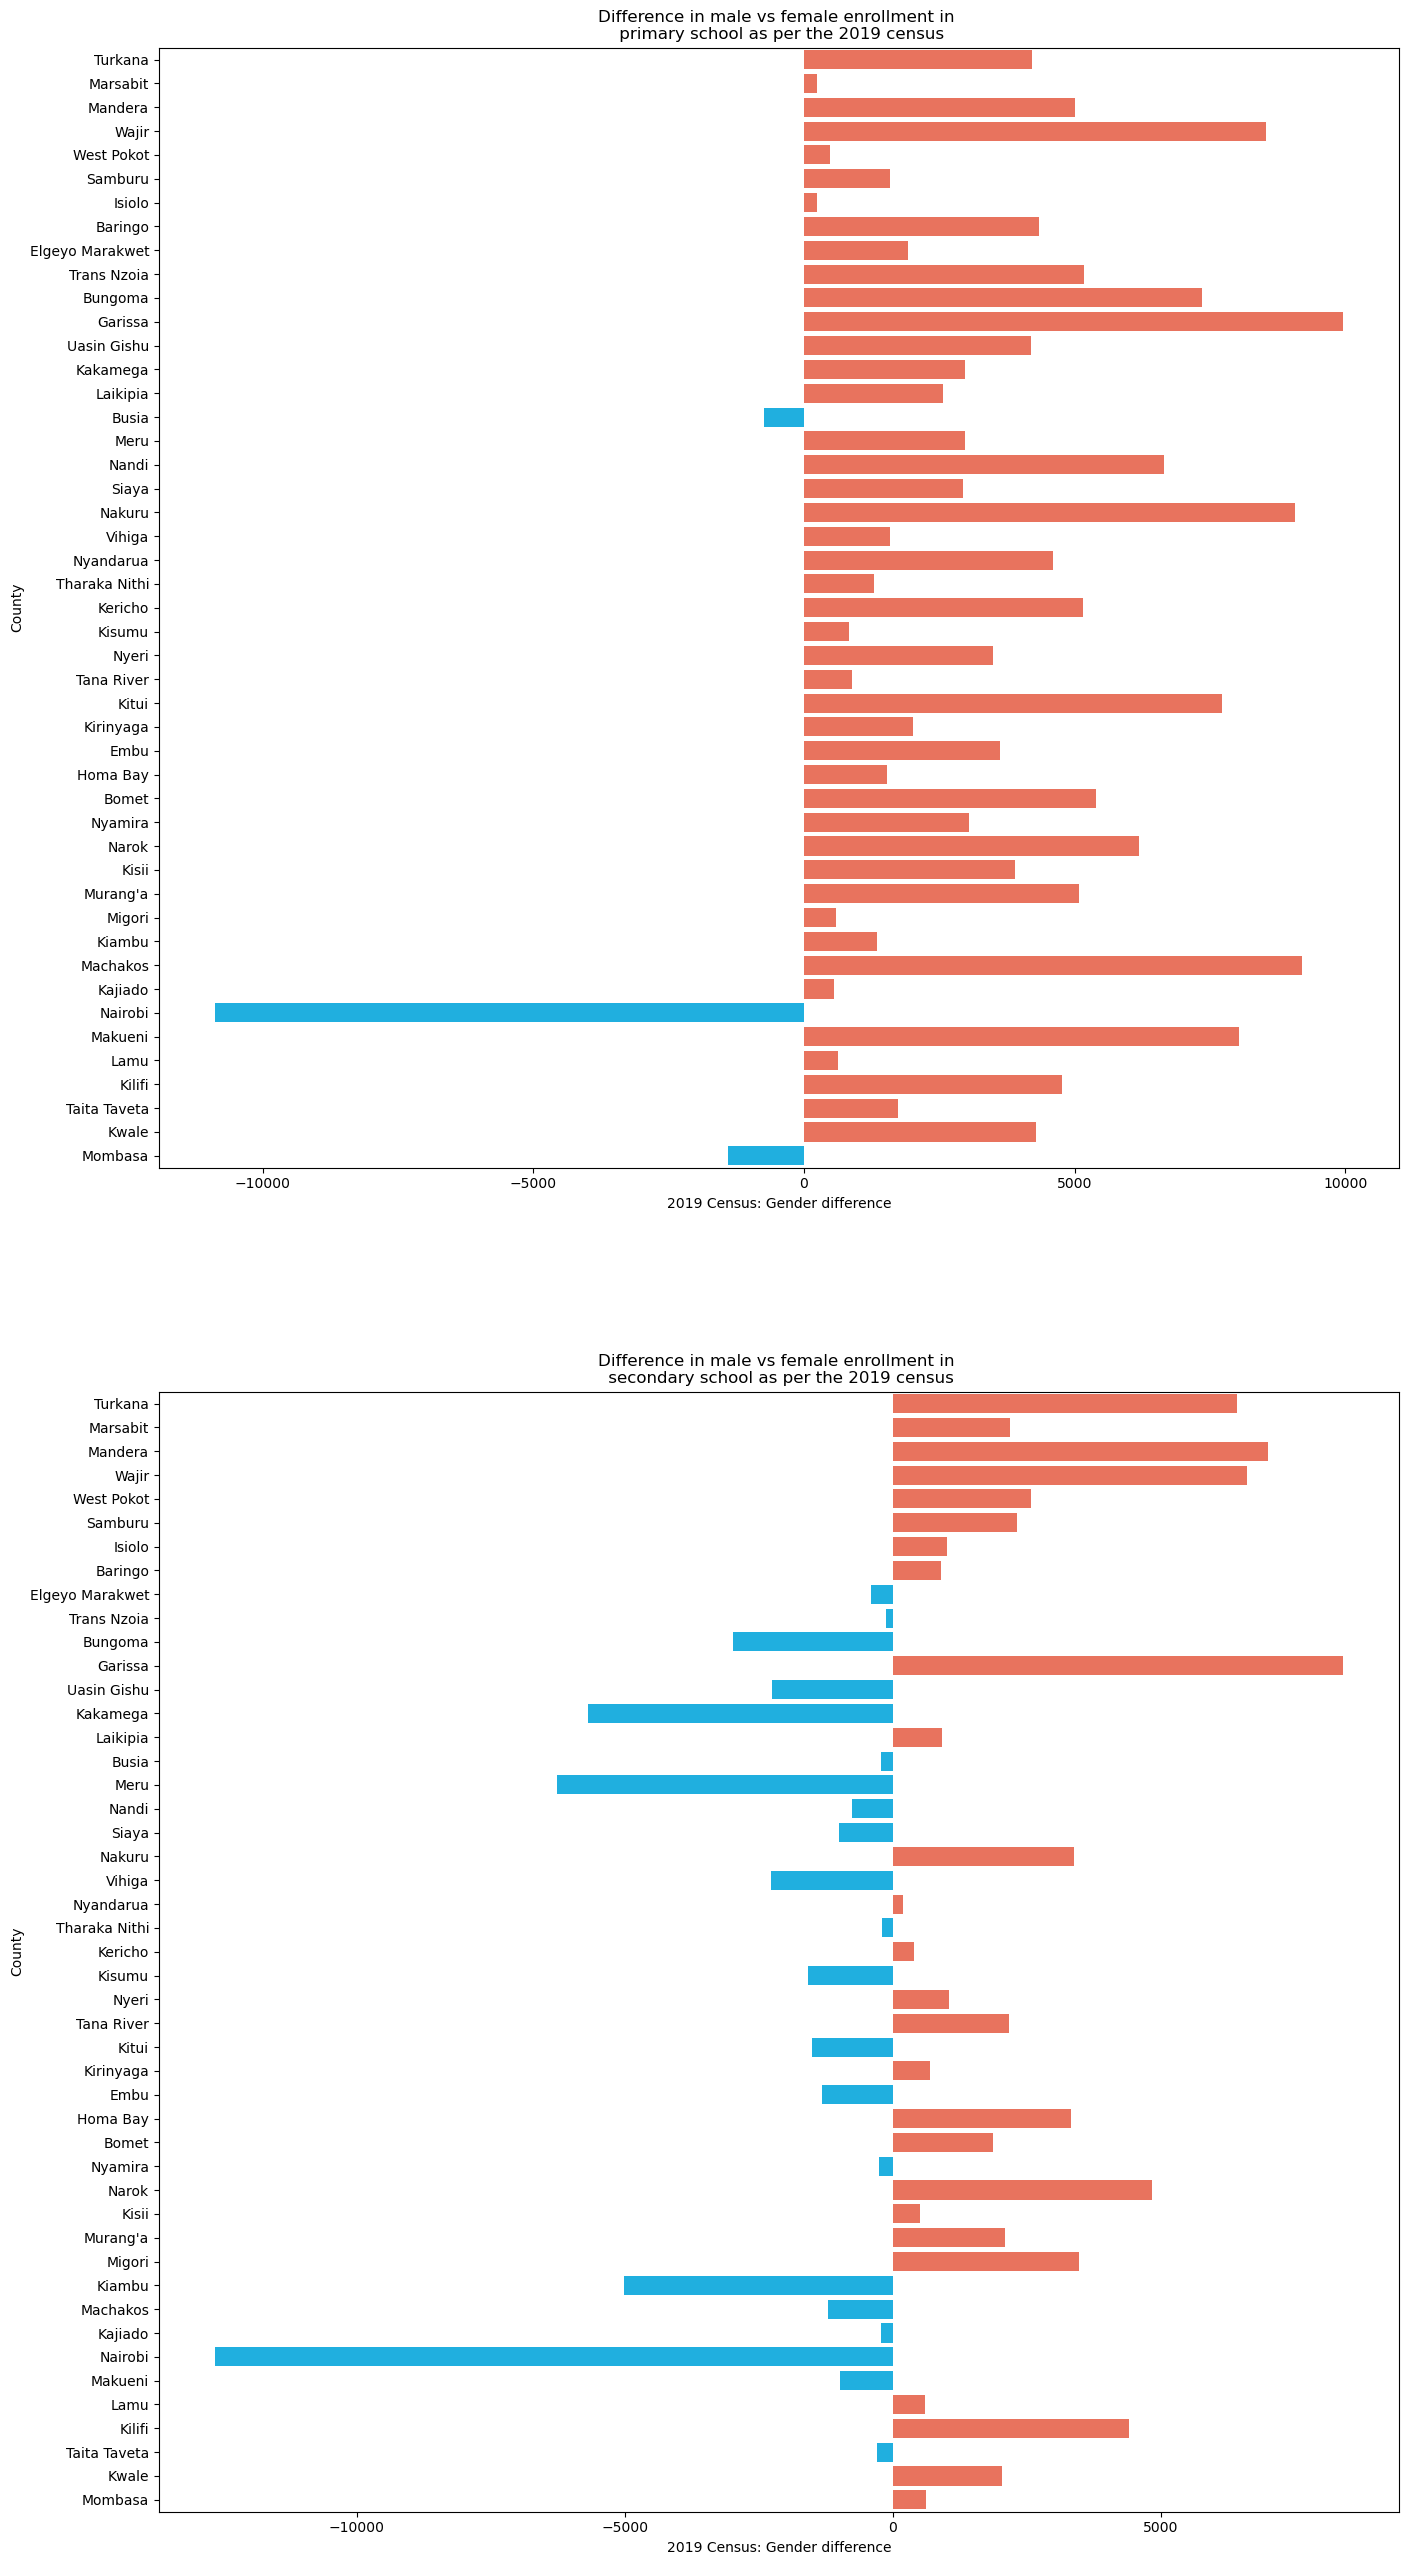

In [108]:
f,ax = plt.subplots(2,1, figsize=(16,32))

#Difference in male vs female enrollment in primary school
c=sns.barplot(data=map_primary, x='2019 Census: Gender difference', y='County',ax=ax[0], palette=diverge_one)

#Difference in male vs female enrollment in secondary school
d=sns.barplot(data=map_secondary,x='2019 Census: Gender difference', y='County', ax=ax[1],palette=diverge_two)

# Titles
ax[0].set_title('Difference in male vs female enrollment in \n primary school as per the 2019 census')
ax[1].set_title('Difference in male vs female enrollment in \n secondary school as per the 2019 census')


# Plot
plt.show()

For the spatial visualisation, I chose to show the average number of students per school in each county. The palette selected was the reversed rocket palette which is colour blind friendly as it has a lot of variation in grey scale, and is a monochromatic palette. To prevent the blurring of the shades, I chose to plot the values in categories to make it easier to see where there is an immediate need ofr action.

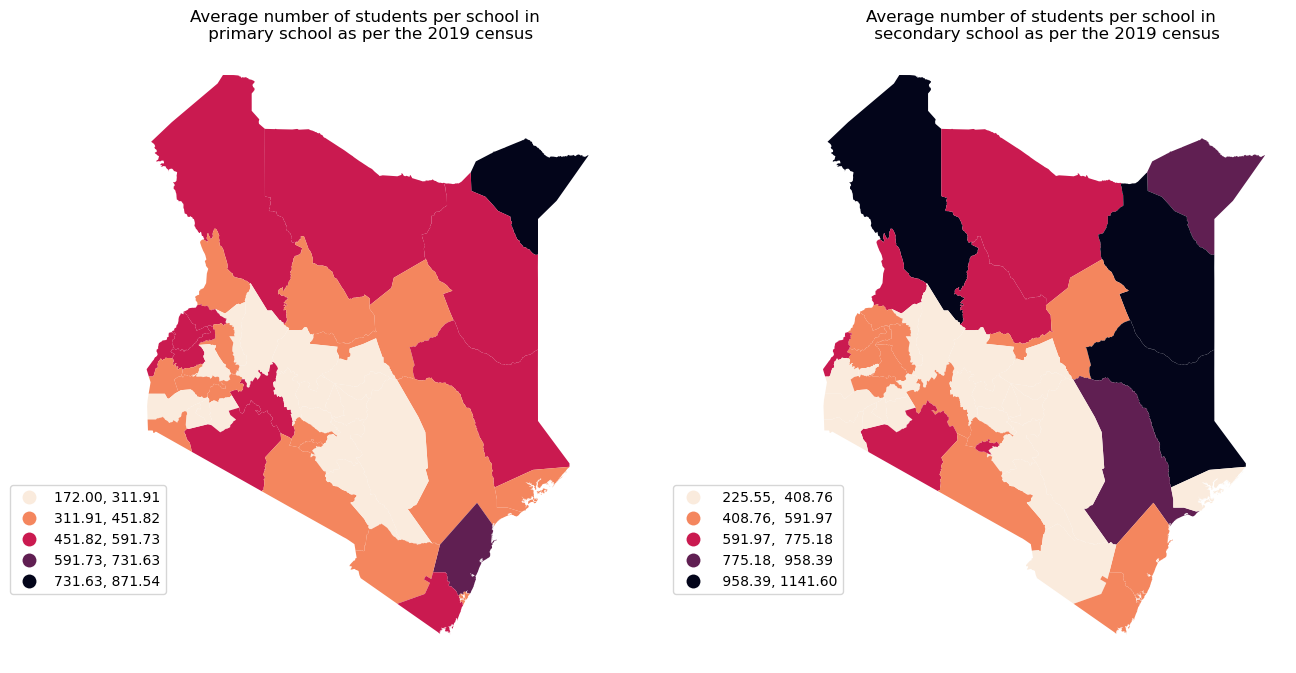

In [109]:
#Okay, so time to plot them out! How does average number of students per school look like?
f,ax = plt.subplots(1,2, figsize=(16,8))

#Average number of students per school in primary school
map_primary.plot(ax=ax[0], column ='2019 Census: Avg students per school', legend=True, scheme='equal_interval',cmap='rocket_r')

#Average number of students per school in secondary school
map_secondary.plot(ax=ax[1], column ='2019 Census: Avg students per school', legend=True, scheme='equal_interval',cmap='rocket_r')

# Titles
ax[0].set_title('Average number of students per school in \n primary school as per the 2019 census')
ax[1].set_title('Average number of students per school in \n secondary school as per the 2019 census')

#Remove the axis
ax[0].set_axis_off()
ax[1].set_axis_off()

#Move the legend
ax[0].get_legend().set_bbox_to_anchor((.10, .3))
ax[1].get_legend().set_bbox_to_anchor((.10, .3))

# Plot
plt.show()

## References
<p><a href="https://education.go.ke/background-information">[1]</a>Ministry of Education (2023). "Background information." Retrieved 2 December 2023, 2023, from https://education.go.ke/background-information.</p>
<p><a href="http://books.openedition.org/africae/2540">[2]</a>Charton, H. (2021). What Education for All in Kenya? The School of Inequalities. Kenya in Motion 2000-2020. Paris & Nairobi, Africae.</p>
<p><a href="https://rafiki-foundation.org.uk/wp-content/uploads/2021/11/Education-factsheet-Kenya.pdf">[3]</a>Rafiki Thabo Foundation (2015). "Factsheet: Education in Kenya." Retrieved 4 December 2023,  from https://rafiki-foundation.org.uk/wp-content/uploads/2021/11/Education-factsheet-Kenya.pdf.</p>
<p><a href="https://www.knbs.or.ke/download/statistical-abstract-2021/">[4]</a>Kenya National Bureau of Statistics (2021). Statistical Abstract 2021. Statistical Abstract 2021. Kenya National Bureau of Statistics.</p>
<p><a href="https://www.researchgate.net/publication/242223372_Access_to_Basic_Education_in_Kenya_inherent_concerns">[5]</a>Odebero, S., et al. (2007). "Access to Basic Education in Kenya: inherent concerns." Educational Research and Review 2</p>
<p><a href="https://www.kaggle.com/datasets/eswillz/kenya-shapefiles">[6]</a>Mburu, w. (2021). "Kenya-shapefiles" Retrieved 4 December 2023,from https://www.kaggle.com/datasets/eswillz/kenya-shapefiles.</p>
<p><a href="https://www.kaggle.com/datasets/ambarish/kenya-counties-shapefile">[7]</a>Bukun (2021). "Kenya Counties Shapefile" Retrieved 4 December 2023, from https://www.kaggle.com/datasets/ambarish/kenya-counties-shapefile.</p>
<p><a href="https://www.knbs.or.ke/data-tables/">[8]</a>Kenya National Bureau of Statistics (2019). "Data Tables" Retrieved 4 December 2023, from https://www.knbs.or.ke/data-tables/ under the Education and Training tab</p>
<p><a href="https://www.kaggle.com/datasets/paulmaluki/kenyapopulationdistibution-2019-censuscsv">[9]</a> Raul Six (2020). "Kenya-population-distibution (2019 census).csv" Retrieved 4 December 2023, from https://www.kaggle.com/datasets/paulmaluki/kenyapopulationdistibution-2019-censuscsv. </p>